<a href="https://colab.research.google.com/github/armandossrecife/my_validation/blob/main/My_KLSATD_Commits_and_my_Issues_from_ActiveMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de ATD do Repositório do ActiveMQ

Dada uma lista de **classes críticas** identificadas pelo método ATDCodeAnalyzer (https://github.com/mining-software-repositories/cassandra), checa se estas classes estão relacionadas a commits dos issues com  architectural issues.

A validação será feita por meio de métodos de SATD nos commits e nos issues do repositório.

Logo abaixo seguem os passos da validação:

1. Instala dependências e bibliotecas para execução dos scripts

2. Funções e classes de apoio para análise de commits, issues e SATD

3. Clona o repositório para análise

4. Keywords de acordo com a literatura em SATD e KL SATD.

5. Análise dos commits

6. Análise dos issues

7. Análise dos commits com SATD keywords e arquivos críticos e issues relacionados

8. Validação dos arquivos críticos junto aos issues selecionados

Obs: tempo de execução: ~1 hora

# Passos do experimento SATD em commits, issues com Classes Críticas (by ATDCodeAnalyzer)

Análise de SATD das mensagens e diffs de commits, bem como análise dos conteúdos de summary, description e comments de issues registrados em commits



1.   Definir o conjunto de keywords da literatura e KL SATD

2.   Fazer a análise de keywords para as mensagens dos commits e os diffs dos commits
-  Filtrar apenas os commits que possuam as classes críticas (by ATDCodeAnalyzer)

3.   Fazer a análise de keywords para os issues que são registrados nos commits para os summary, description e comments
- Filtrar apenas os issues com commits que possuam as classes críticas (by ATDCodeAnalyzer)

## My SATD Analyzer

Describe the steps to analyze commits and issues with SATD keywords

1. Identify Keywords for Self-Admitted Technical Debt (SATD):
Start by identifying keywords or phrases that commonly indicate self-admitted technical debt. These keywords can be derived from literature or based on your understanding of common terms used in code comments, commit messages, and issue descriptions. For example, common keywords may include "TODO," "FIXME," "refactor," "technical debt," "hack," "workaround," etc.

2. Create a Dictionary of SATD Keywords:
Build a dictionary or a set of SATD keywords that will serve as the basis for content queries in commit messages, modified file comments, and issue descriptions. This dictionary should include the keywords identified in Step 1.

3. Using PyDriller for Commit Analysis:
You can use PyDriller to analyze commits from the repository. PyDriller is a Python library for analyzing Git repositories. Install it using pip.
Create Python scripts that use PyDriller to iterate through the commits and identify those that contain SATD keywords in their messages. You can filter commits based on these keywords and store them in a Set.

4. Analyze Modified Files in Commits:
For each commit, extract the list of modified files. Open and analyze these files to check for SATD keywords in the code comments within the modified lines. Store the commits with modified files containing SATD in a separate Set.

5. Retrieve Issues from the Issue Tracker:
Utilize an API or libraries like JIRA's REST API to fetch issues from the issue tracker (JIRA in this case). For example, you can use Python's requests library to interact with the JIRA API. Query issues based on project (e.g., CASSANDRA) and extract the content of the Summary, Description, and Comments fields for each issue.

## My Validation

As previously outlined, the ATDCodeAnalyzer approach introduced in this thesis aims to automatically identify source code artifacts affected by ATD. This approach distinguishes itself from previous methods by operating autonomously, obviating the requirement for expert analysis in software architecture within the context of the analyzed repository. Therefore, following the application of the ATDCodeAnalyzer, our objective is to determine the extent to which the identified critical files are genuinely influenced by architectural issues and technical debt. To achieve this, we have devised a qualitative validation method to assess the efficacy of our proposed approach.

**A - Software Artifacts Collection and ATDCodeAnalyzer**: The process begins by extracting information from the repository and executing the ATDCodeAnalyzer to identify Critical Files based on our proposed approach.

**B - Commit Analysis**: The modified files are analyzed based on the range and select only the commits that have critical files identified by ATDCodeAnalyzer.

**C - Issue Tracker Analysis**: This phase is related to the process of extracting information from all issues from the issue tracker, recording information about fields related to each issue in the analyzed repository.

**D - SATD Analysis**: This phase is related to extracting SATD keywords from commits in the repository. In this phase, it selects commits that have SATD keywords in messages and the diff of modified files

**F - Select Issues for Inspection**: During this phase, issues are selected for manual inspection to check if these issues have architectural problems.

**G - Inspection Aided by ChatGPT**: In this phase, we use ChatGPT to aid in the analysis of each issue to determine if the issue has architectural problems and save the justification for each inspection.

**H - Issues with Architectural Problems**: Finally, in this last phase, we calculate the percentage of issues that do or do not have architectural problems to validate if the Critical files identified by ATDCodeAnalyzer have architectural issues.


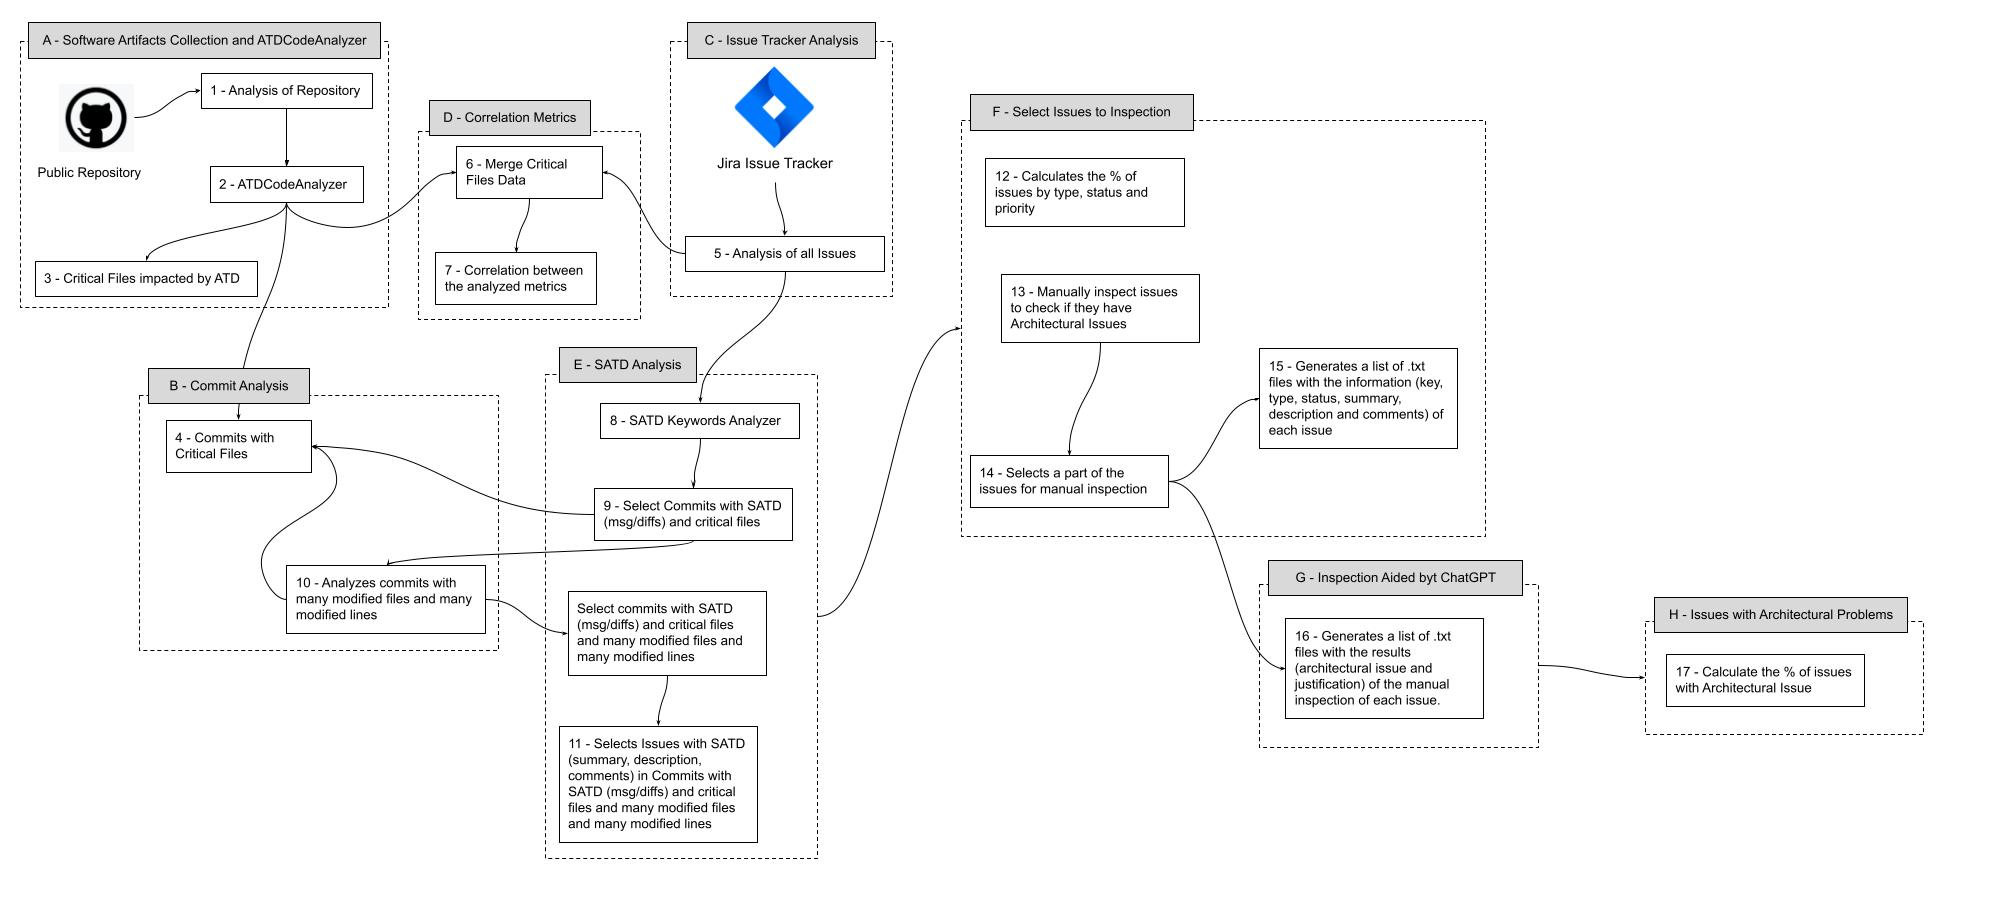

# Variáveis especiais

In [1]:
# 1. Quantidade total de commits analisados faixa from x to y
ve_lista_com_todos_os_commits = []
ve_qtd_total_commits = 0

#2. Quantidade de commits com arquivos críticos
ve_lista_commits_com_arquivos_criticos = []
ve_qtd_commits_com_arquivos_criticos = 0

#3. Quantidade total de issues analisados
ve_lista_com_todos_os_issues = []
ve_qtd_total_issues = 0

# 4. Correlação entre as métricas analisadas
#4.1 Merge dos dados (commits e issues) dos arquivos críticos (8) - r4
#4.2 Diagrama de Correlação (9) - r5

#5. Quantidade total de issues
ve_lista_com_todos_issues = []
ve_qtd_total_issues = 0

#5.1 Issues que aparecem nos commits
ve_lista_com_issues_e_nos_commits = []
ve_qtd_issues_e_nos_commits = 0

#5.1 Issues que aparecem nos commits com arquivos críticos
ve_lista_com_issues_e_nos_commits_com_arquivos_criticos = []
ve_qtd_issues_e_nos_commits_com_arquivos_criticos = 0

#6. Quantidade de commits que possuem SATD keywords
#6.1 Commits com keywords
ve_lista_com_todos_commits_com_keywords = []
ve_qtd_total_commits_com_keywords = 0

# 6.2 Commits com keywords e arquivos criticos
ve_lista_com_commits_com_arquivos_criticos_com_keywords = []
ve_qtd_commits_com_arquivos_criticos_com_keywords = 0

# 1. Install the dependencies

- Pydriller
- GitPython
- JiraPython
- SQLite

In [3]:
print('Install Pydriller.')
!pip install pydriller > install_pydriller.log
print('Install gitpython.')
!pip3 install gitpython > install_gitpython.log
print('Install Jira Python lib.')
!pip install jira > install_jira_python.log
print('Install SQLite in Linux')
!sudo apt install -y sqlite3 > install_sqlite.log
print('All depenpencies installed!')
!cat *.log > install.log
print('Details in install.log')

Install Pydriller.
Install gitpython.
Install Jira Python lib.
Install SQLite in Linux


All depenpencies installed!
cat: install.log: input file is output file
Details in install.log


# 2. Import dependencies, configurations, functions and supporting classes

In [4]:
from pydriller import Repository
import tqdm
import os
import re

from jira import JIRA
from datetime import datetime, timedelta
import sqlite3
import subprocess

import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import scipy.stats as stats
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [6]:
url_to_repository = 'https://github.com/apache/activemq.git'
path_to_repository = 'activemq'
os.environ['MY_REPOSITORY'] = url_to_repository

JIRA_SERVER = 'https://issues.apache.org/jira'
DATABASE_NAME = "issues_db.db"

os.environ['DATABASE_NAME'] = DATABASE_NAME
# Credentials
os.environ['USERNAME'] = 'armandossrecife'
os.environ['PASSWORD'] = 'sky1979#ce'
username = os.environ.get('USERNAME')
password = os.environ.get('PASSWORD')

In [7]:
class SATDCommitAnalyzer:
    def __init__(self, path_to_repository):
        self.path_to_repository = path_to_repository

    @staticmethod
    def is_java_comment(line):
        """Checks if a line is a single-line Java comment.
        Args:
          line: The line to check.
        Returns:
          True if the line is a single-line Java comment, False otherwise.
        """
        # Regular expression pattern to match Java comments
        comment_pattern = r'^\s*//|^\s*/\*|^\s*\*|^\s*\*/'
        # Use the re.match function to check if the line matches the comment pattern
        return bool(re.match(comment_pattern, line))

    def analyze_commits_for_satd(self, start_date, end_date, satd_keywords):
        """Analyzes commits for SATD by checking if the commit message contains any of the specified SATD keywords.
        Args:
          start_date: The start date of the date range to analyze commits within.
          end_date: The end date of the date range to analyze commits within.
          satd_keywords: A list of SATD keywords to search for in commit messages.
        Returns:
          A tuple containing two sets:
            * A set of commit hashes that contain SATD keywords in their commit messages.
            * A dictionary mapping commit hashes to their associated commit messages.
        """
        # Initialize sets to store commits and their associated SATD keywords
        commits_with_satd = set()
        dict_commit_msg = {}

        # Traverse commits within the specified date range
        print('Aguarde...')
        my_traverser_commits = Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits()
        total_commits = len(list(my_traverser_commits))

        for commit in tqdm.tqdm(Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits(), total=total_commits, desc="Progress SATD message commit analysis"):
            for keyword in satd_keywords:
                if keyword in commit.msg:
                    commits_with_satd.add(commit.hash)
                    dict_commit_msg[commit.hash] = commit.msg

        return commits_with_satd, dict_commit_msg

    def analyze_commit_diffs_for_satd(self, start_date, end_date, satd_keywords):
        """Analyzes commit diffs for SATD by checking if any of the specified SATD keywords are found in any of the added lines of the diff.
        Args:
          start_date: The start date of the date range to analyze commit diffs within.
          end_date: The end date of the date range to analyze commit diffs within.
          satd_keywords: A list of SATD keywords to search for in commit diffs.
        Returns:
          A dictionary mapping commit hashes to lists of tuples, where each tuple contains a SATD keyword and the corresponding line of the diff where the keyword was found.
        """
        # Initialize a dictionary to store commit hashes and their associated SATD keywords and diff content
        dict_commit_diffs = {}

        # Traverse commits within the specified date range
        print('Aguarde...')
        my_traverser_commits = Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits()
        total_commits = len(list(my_traverser_commits))

        for commit in tqdm.tqdm(Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits(), total=total_commits, desc="Progress SATD diff commit analysis"):
            list_keywords_by_commit = []
            list_diff_content_by_commit = []

            for modification in commit.modified_files:
                for line in modification.diff_parsed['added']:
                    valor_linha = line[0]
                    conteudo_linha = line[1]

                    for keyword in satd_keywords:
                        if SATDCommitAnalyzer.is_java_comment(conteudo_linha):
                            if keyword in conteudo_linha:
                                list_keywords_by_commit.append(keyword)
                                list_diff_content_by_commit.append(conteudo_linha)

            if list_keywords_by_commit:
                elemento = list_keywords_by_commit, list_diff_content_by_commit
                dict_commit_diffs[commit.hash] = elemento

        return dict_commit_diffs

    def total_of_commits(self, start_date, end_date):
        # Traverse commits within the specified date range
        print('Aguarde...')
        my_traverser_commits = Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits()
        total_commits = len(list(my_traverser_commits))
        lista_hash_commits = []
        for commit in tqdm.tqdm(Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits(), total=total_commits, desc="Progress messagem commit analysis"):
            lista_hash_commits.append(commit.hash)
        return total_commits, lista_hash_commits

In [8]:
def get_commits_by_range_and_critical_files(initial_date, final_date, critical_files):
  """Extracts information from a date range of commits, focusing on critical files.
  Args:
      initial_date: inicial date of commits
      final_date: final date of commits
      critical_files: A list of critical file paths. ex: ['StorageService.java', 'ColumnFamilyStore.java']
  Returns:
        A dictionary of commits, where the keys are the commit hashes and the
        values are tuples containing the commit message, a list of critical files modified in the commit, a dictionary of diff [filename]:filename.diff, a list_of_modified_files, a list of all diffs from modified files
  """

  dict_commit_modified_files = {}
  print('Wait...')
  my_traverser_commits = Repository("activemq", since=initial_date, to=final_date).traverse_commits()
  total_commits = len(list(my_traverser_commits))
  try:
    for commit in tqdm.tqdm(Repository("activemq", since=initial_date, to=final_date).traverse_commits(), total=total_commits, desc="Progress critical files commit anlysis"):
      list_of_critical_files_modified = []
      list_of_modified_files = []
      list_dict_of_diff_files = []
      list_dict_of_diff_modified_files = []
      for m in commit.modified_files:
        dict_diff_file = {}
        list_of_modified_files.append(m.filename)
        list_dict_of_diff_modified_files.append(m.diff)
        if m.filename in critical_files:
          list_of_critical_files_modified.append(m.filename)
          dict_diff_file[m.filename] = m.diff
          list_dict_of_diff_files.append(dict_diff_file)
      if len(list_of_critical_files_modified) > 0:
        data_commit = str(commit.committer_date.day) + '/' + str(commit.committer_date.month) + '/' + str(commit.committer_date.year)
        element = commit.msg, list_of_critical_files_modified, data_commit, commit.lines, commit.files, list_dict_of_diff_files, list_of_modified_files, list_dict_of_diff_modified_files
        dict_commit_modified_files[commit.hash] = element
  except Exception as ex:
    print(f'Erro during travesse commits: {str(ex)}')
  return dict_commit_modified_files, total_commits

def get_commits_by_range(initial_date, final_date):
  """Extracts information from a date range of commits
  Args:
      initial_date: inicial date of commits
      final_date: final date of commits
  Returns:
        A dictionary of commits, where the keys are the commit hashes and the
        values are tuples containing the commit message, files modified in the commit, a dictionary of diff [filename]:filename.diff, a list_of_modified_files, a list of all diffs from modified files
  """
  dict_commit_modified_files = {}
  print('Wait...')
  my_traverser_commits = Repository("activemq", since=initial_date, to=final_date).traverse_commits()
  total_commits = len(list(my_traverser_commits))
  try:
    for commit in tqdm.tqdm(Repository("activemq", since=initial_date, to=final_date).traverse_commits(), total=total_commits, desc="Progress commit anlysis"):

      list_of_modified_files = []
      list_dict_of_diff_files = []
      list_dict_of_diff_modified_files = []
      for m in commit.modified_files:
        if m is not None:
          dict_diff_file = {}
          list_of_modified_files.append(m.filename)
          list_dict_of_diff_modified_files.append(m.diff)
      if len(list_of_modified_files) > 0:
        data_commit = str(commit.committer_date.day) + '/' + str(commit.committer_date.month) + '/' + str(commit.committer_date.year)
        element = commit.msg, data_commit, commit.lines, commit.files, list_dict_of_diff_files, list_of_modified_files, list_dict_of_diff_modified_files
        dict_commit_modified_files[commit.hash] = element
  except Exception as ex:
    print(f'Erro during travesse commits: {str(ex)}')
  return dict_commit_modified_files, total_commits

In [9]:
class JiraIssue:
  def __init__(self, key, summary, issue_type, status, priority, description, comments):
    self.key = key
    self.summary = summary
    self.issue_type = issue_type
    self.status = status
    self.priority = priority
    self.description = description
    self.comments = comments

  def get_comments(self):
    return self.comments

  def __str__(self):
    return (f'Key: {self.key}, Summary: {self.summary}, Type: {self.issue_type}, Status: {self.status}')

class JiraIssues:
  def __init__(self,project, issues):
    self.project = project
    self.issues = issues

  def add_issue(self, issue):
    self.issues.append(issue)

  def get_issues(self) -> list:
    return self.issues

  def update_issues(self, issues):
    self.issues = issues

  def __str__(self):
    str_issues = ""
    for issue in self.get_issues():
      str_issues = str_issues + str(issue)
      str_issues = str_issues + ', '
    str_issues = '[' + str_issues + ']'
    return (f'Project: {self.project}, Qdt of issues: {len(self.issues)}, Issues: {str_issues}')

# Classe de utilidades para manipular o servidor Jira
class JiraUtils:
  def __init__(self, project, jira_instance):
    self.project = project
    self.jira_jira_instance = jira_instance

  def generate_intervals_between_dates(self, date1: tuple, date2: tuple, distance=120) -> list:
    start_date = datetime(date1[0], date1[1], date1[2])
    end_date = datetime(date2[0], date2[1], date2[2])
    interval_days = distance
    # Initialize a list to store the intervals
    intervals = []
    # Initialize the current date as the start date
    current_date = start_date
    # Loop to generate intervals until the current date is less than or equal to the end date
    while current_date < end_date:
        interval = (current_date, current_date + timedelta(days=interval_days - 1))
        intervals.append(interval)
        current_date += timedelta(days=interval_days)
    return intervals

  def convert_interval_dates(self, dates: list) -> list:
    list_interval_dates = []
    for each in dates:
      date1 = each[0]
      # Convert the date to a string in the format "YYYY/MM/DD".
      str_date1 = date1.strftime("%Y/%m/%d")
      date2 = each[1]
      str_date2 = date2.strftime("%Y/%m/%d")
      elemento = str_date1, str_date2
      list_interval_dates.append(elemento)
    return list_interval_dates

  def generate_list_of_sentences(self, dates: list) -> list:
    lista_sentencas = []
    for each in dates:
      str_date1 = each[0].strftime("%Y/%m/%d")
      str_date2 = each[1].strftime("%Y/%m/%d")
      sentenca = f'project={self.project.upper()} and created>="{str_date1}" and created<="{str_date2}"'
      lista_sentencas.append(sentenca)
    return lista_sentencas

  def get_list_of_block_issues_by_dates(self,date1, date2, distance=120) -> list:
    print('Aguarde...')
    t1 = datetime.now()
    list_of_dates = self.generate_intervals_between_dates(date1,date2,distance)
    lista_sentencas = self.generate_list_of_sentences(list_of_dates)
    lista_bloco_issues_by_date = []
    total_items = len(lista_sentencas)
    i = 0
    iterable_lista_sentencas = tqdm.tqdm(lista_sentencas, total=total_items)
    for each in iterable_lista_sentencas:
      issues_by_date_temp = self.jira_jira_instance.search_issues(each,maxResults=1000)
      print(f'Range: {each}, qtd issues: {len(issues_by_date_temp)}')
      lista_bloco_issues_by_date.append(issues_by_date_temp)
      percentage = (i + 1) / total_items * 100
      iterable_lista_sentencas.set_description(f"Progress Message Analysis")
    i += 1
    t2 = datetime.now()
    print(t2)
    print(f'Tempo da consulta: {t2-t1}')
    return lista_bloco_issues_by_date

  def concatenate_block_of_issues(self,block_of_issues):
    concatenated_list = [item for sublist in block_of_issues for item in sublist]
    print(f'Total de issues recuperados: {len(concatenated_list)}')
    return concatenated_list

class IssuesDatabase:
    def __init__(self, database_name):
        self.database_name = database_name
        self.create_tables()

    def create_tables(self):
        self.conn = sqlite3.connect(self.database_name)
        self.cursor = self.conn.cursor()

        self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS Issues (
                id INTEGER PRIMARY KEY,
                project TEXT,
                key TEXT,
                summary TEXT,
                issue_type TEXT,
                status TEXT,
                priority TEXT,
                description TEXT
            )
        ''')

        self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS Comments (
                id INTEGER PRIMARY KEY,
                key TEXT,
                comment TEXT
            )
        ''')

        self.conn.commit()

    def insert_in_table_issues(self, project, key, summary, issue_type, status, priority, description):
        values = (None, project, key, summary, issue_type, status, priority, description)
        self.cursor.execute('''
            INSERT INTO Issues
            (id, project, key, summary, issue_type, status, priority, description)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', values)

        self.conn.commit()

    def insert_in_table_comments(self, key, comment):
        values = (None, key, comment)
        self.cursor.execute('''
            INSERT INTO Comments
            (id, key, comment)
            VALUES (?, ?, ?)
        ''', values)

        self.conn.commit()

    def show_content(self, table):
        query = f"SELECT * FROM {table}"
        self.cursor.execute(query)

        rows = self.cursor.fetchall()
        for row in rows:
            print(row)

    def show_n_lines(self, table, n):
        query = f"SELECT * FROM {table}"
        self.cursor.execute(query)

        rows = self.cursor.fetchall()

        for i, row in enumerate(rows):
            print(row)
            if i == n:
              break

    def close_connection(self):
        self.conn.close()

def analyze_jira_all_issues(project, all_issues):
    # Create an instance of JiraIssues to manage all issues
    my_all_issues = JiraIssues(project, [])

    total_items = len(all_issues)

    # Iterate through the fetched issues
    for issue in tqdm.tqdm(all_issues, total=total_items, desc='Progress jira all issues analysis'):
        issue_key = issue.key
        issue_summary = issue.fields.summary
        issue_description = issue.fields.description
        issue_comments = [comment.body for comment in issue.fields.comment.comments]

        # Check for SATD keywords in the issue's summary, description, and comments
        if issue_summary is None:
            issue_summary = ""
        if issue_description is None:
            issue_description = ""
        if issue_comments is None:
            issue_comments = ""

        #is_satd = any(keyword in (issue_summary + issue_description + ' '.join(issue_comments)) for keyword in satd_keywords)

        #if is_satd:
        issue_type = issue.fields.issuetype.name
        issue_status = issue.fields.status.name
        issue_priority = issue.fields.priority.name

        # Create a JiraIssue instance for the SATD issue
        my_issue = JiraIssue(issue_key, issue_summary, issue_type, issue_status, issue_priority, issue_description, issue_comments)

            # Add the SATD issue to the list of SATD issues
        my_all_issues.add_issue(my_issue)

    return my_all_issues

In [ ]:
#!rm -rf activemq

# 3. Cloning the local repository

In [10]:
print(f'Clona o repositório : {url_to_repository}')
!git clone $MY_REPOSITORY

Clona o repositório : https://github.com/apache/activemq.git
Cloning into 'activemq'...
remote: Enumerating objects: 237752, done.
remote: Counting objects: 100% (4518/4518), done.
remote: Compressing objects: 100% (2123/2123), done.
remote: Total 237752 (delta 1952), reused 4129 (delta 1740), pack-reused 233234
Receiving objects: 100% (237752/237752), 61.59 MiB | 24.68 MiB/s, done.
Resolving deltas: 100% (114946/114946), done.


In [11]:
!cd activemq && git log --pretty="%H %s" > all_commits_msg.txt
!cd activemq && git log --pretty="%H;%ai;%s" > all_commits_full.txt

# Dados do 1o commit e do ultimo commit
!echo "Último commit: "
!head /content/activemq/all_commits_full.txt -n 1
!echo "Primeiro commit: "
!tail /content/activemq/all_commits_full.txt -n 1

Último commit: 
464efe0e6ffa85efffd971d7f8ef548af1b3daa0;2023-11-12 06:35:12 +0100;[maven-release-plugin] prepare for next development iteration
Primeiro commit: 
40a7d3b6ac35d2ecb34e85fc3403d2e48e33874e;2005-12-12 17:53:59 +0000;Moved the trunk code into the trunk sub directory


# 4. Keywords about SATD (Self-admitted Technical Debt)

Self-Admitted Technical Debt (SATD) refers to situations where the developers are aware that the current implementation is not optimal and write comments alerting of the problems [3]

[1] Rantala, Leevi, and Mika Mäntylä. "Predicting technical debt from commit contents: reproduction and extension with automated feature selection." Software Quality Journal 28 (2020): 1551-1579. ~> https://link.springer.com/article/10.1007/s11219-020-09520-3

[2] Li, Yikun, Mohamed Soliman, and Paris Avgeriou. "Automatic identification of self-admitted technical debt from four different sources." Empirical Software Engineering 28, no. 3 (2023): 1-38. ~> https://link.springer.com/article/10.1007/s10664-023-10297-9

[3] Potdar, Aniket, and Emad Shihab. "An exploratory study on self-admitted technical debt." In 2014 IEEE International Conference on Software Maintenance and Evolution, pp. 91-100. IEEE, 2014. ~> https://ieeexplore.ieee.org/abstract/document/6976075

In [12]:
satd_keywords_1_2 = {
    "typo", "unused import", "error message", "comment", "logging", "javadoc", "minor", "update",
    "debug", "code cleanup", "formatting", "more tests", "documentation", "work in progress",
    "improvement", "rename", "support for", "header", "interface", "annotation", "naming",
    "tidy up", "files", "extension point", "exception", "handling", "test", "output", "cast",
    "simplify", "findbugs", "leak", "implementation", "unused code", "API", "refactoring",
    "checkstyle errors", "redundant", "deprecated code", "constructor", "endpoints", "flaky",
    "unused", "unnecessary", "confusing", "ugly", "simplify", "too much", "not used", "more readable",
    "more efficient", "dead code", "infinite loop", "too long", "not implemented", "less verbose",
    "more robust", "speed up", "get rid of", "not thread safe", "clean up code", "not done yet",
    "avoid extra seek", "reduce duplicate code", "no longer needed", "not supported yet",
    "documentation doesn't match", "short term solution", "spurious error messages", "it'd be nice",
    "please add a test", "would significantly improve", "performance", "makes it much easier",
    "avoid calling it twice", "takes a long time", "good to have coverage",
    "makes it very hard", "patch doesn't apply cleanly", "it's not perfectly documented",
    "need to update documentation", "make it less brittle", "documentation does not mention",
    "wastes a lot of space", "there is no unit test", "lead to huge memory allocation",
    "test doesn't add much value", "some holes in the doc", "by hard coding instead of",
    "should be updated to reflect", "more tightly coupled than ideal", "any chance of a test",
    "should improve a bit by", "solution won't be really satisfactory", "misleading",
    "too long", "please add a test", "there is no unit test", "any chance of a test",
    "good to have coverage", "test doesn't add much value", "flaky",
}

satd_keywords_diff_3 = {'TODO', 'FIXME', 'refactor', 'refact', 'hack', 'workaround', 'technical debt', 'cleanup', 'clean', 'fix'}

# Extra keywords
extra_keywords = set([
    "architectural issue", "architectural smell", "architectural debt", "design debt", "code rot", "spaghetti code",
    "quick fix", "temporary solution", "workaround", "hack", "technical kludge", "inconsistency", "race condition", "performance",
    "scalability", "reliability", "maintainability", "code duplication", "code complexity", "tight coupling", "fragile code",
    "magic numbers", "magic strings", "lack of modularity", "lack of encapsulation", "lack of abstraction", "lack of documentation",
    "lack of testing", "complexity", "duplication", "modularity", "encapsulation", "design", "violation", "dependency",
    "dependencies", "refactoring", "cyclic dependency", "unstable", "cross-module",
    "code smell", "architectural problem", "design issue", "system design problem",
    "technical debt due to architectural issues", "code debt", "technical debt due to design issues", "design flaws",
    "disorganized code", "difficult to maintain code", "poorly structured code", "complex code",
    "concurrency issue", "multithreading issue", "synchronization issue",
    "speed", "throughput", "latency", "response time",
    "scalability issue", "ability to handle increased load",
    "dependability", "trustworthiness", "fault tolerance", "robustness",
    "ease of maintenance", "maintainability issue", "ability to evolve",
    "code redundancy", "repeated code",
    "code difficulty", "complex code", "difficult to understand code",
    "code entanglement", "code interdependencies", "complex code relationships",
    "delicate code", "brittle code", "easy to break code",
    "literal values", "hard-coded values", "undocumented values",
    "literal strings", "hard-coded strings", "undocumented strings",
    "monolithic code", "lack of separation of concerns", "lack of cohesion",
    "exposed internal state", "lack of information hiding",
    "concrete code", "lack of generalization",
    "undocumented code", "poorly documented code", "lack of code comments",
    "untested code", "poorly tested code", "lack of test cases",
    "code complexity", "cyclomatic complexity", "cognitive complexity",
    "code dependencies", "module dependencies", "system dependencies",
    "code restructuring", "code improvement", "code simplification",
    "circular dependency", "indirect dependency",
    "buggy code", "flaky code", "unreliable code",
    "inter-module", "module-to-module"
])

extra_keywords_td = set([
    "anti-pattern", "bad practice", "code smell", "design smell", "technical debt",
    "wrong solution", "poor solution", "ineffective solution", "inefficient solution", "suboptimal solution",
    "wrong way", "poor way", "ineffective way", "inefficient way", "suboptimal way",
    "code defect", "code problem", "code issue", "code flaw",
    "design defect", "design problem", "design issue", "design flaw",
    "code debt", "design debt", "architectural debt", "implementation debt", "testing debt", "documentation debt"
])

my_satd_keywords = satd_keywords_diff_3.union(satd_keywords_1_2)

my_satd_aux = my_satd_keywords.union(extra_keywords)

final_satd_keywords = my_satd_aux.union(extra_keywords_td)

# Sort the set of strings in ascending order.
sorted_my_satd_keywords = sorted(final_satd_keywords)

print(f'Qtd de sorted_my_satd_keywords: {len(sorted_my_satd_keywords)}')
# Print the sorted set of strings.
for word in sorted_my_satd_keywords:
  print(word)

Qtd de sorted_my_satd_keywords: 235
API
FIXME
TODO
ability to evolve
ability to handle increased load
annotation
anti-pattern
any chance of a test
architectural debt
architectural issue
architectural problem
architectural smell
avoid calling it twice
avoid extra seek
bad practice
brittle code
buggy code
by hard coding instead of
cast
checkstyle errors
circular dependency
clean
clean up code
cleanup
code cleanup
code complexity
code debt
code defect
code dependencies
code difficulty
code duplication
code entanglement
code flaw
code improvement
code interdependencies
code issue
code problem
code redundancy
code restructuring
code rot
code simplification
code smell
cognitive complexity
comment
complex code
complex code relationships
complexity
concrete code
concurrency issue
confusing
constructor
cross-module
cyclic dependency
cyclomatic complexity
dead code
debug
delicate code
dependability
dependencies
dependency
deprecated code
design
design debt
design defect
design flaw
design flaws


## KL-SATD

A specific subtype of SATD comments is Keyword-Labeled SATD comments (KL-SATD). These are defined as SATD comments, which have a SATD-related keyword in them such as “TODO”, or “FIXME” [8]

[8] L. Rantala, M. M ̈antyl ̈a, D. Lo, Prevalence, contents and automatic detection of kl-satd, in: 2020 46th Euromicro Conference on Software Engineer- ing and Advanced Applications (SEAA).


In [13]:
kl_satd_keywords = ['TODO', 'FIXME', 'FIX']

final_kl_satd_keywords = set(kl_satd_keywords)
print(final_kl_satd_keywords)

{'FIX', 'FIXME', 'TODO'}


# 5. Analyze commits

Analisa todas as mensagens e diffs dos commits entre 2/03/2009 e 4/10/2023 do Cassandra que contem as Keywords coletadas da literatura.

### Análise de todos os commits de uma faixa

In [14]:
start_date = datetime(2009, 1, 1, 0, 0, 0)
end_date = datetime(2023, 10, 4, 0, 0, 0)
all_commits_to_analyze = get_commits_by_range(initial_date=start_date, final_date=end_date)

Wait...


Progress commit anlysis: 100%|██████████| 7941/7941 [01:40<00:00, 78.90it/s]


## 5.1 Analyzes commit messages

Analisa todas as mensagens dos commits entre 2/03/2009 e 4/10/2023 do Kafka que contem as Keywords coletadas da literatura.

In [15]:
start_date = datetime(2009, 1, 1, 0, 0, 0)
end_date = datetime(2023, 10, 4, 0, 0, 0)

my_satd_commit_analyzer = SATDCommitAnalyzer(path_to_repository)
commits_with_satd, dict_commit_msg = my_satd_commit_analyzer.analyze_commits_for_satd(start_date, end_date, final_satd_keywords)

Aguarde...


Progress SATD message commit analysis: 100%|██████████| 7941/7941 [00:02<00:00, 3477.19it/s]


In [16]:
# calcula a quantidade total de commits e a lista (hash) desses commits dentro da faixa analisada
count_commit_analyzer = SATDCommitAnalyzer(path_to_repository)
ve_qtd_total_commits, ve_lista_com_todos_os_commits = count_commit_analyzer.total_of_commits(start_date, end_date)

Aguarde...


Progress messagem commit analysis: 100%|██████████| 7941/7941 [00:01<00:00, 7482.34it/s] 


In [17]:
print(f'Total de commits analisados: {ve_qtd_total_commits} na faixa: de {start_date} até {end_date}')

Total de commits analisados: 7941 na faixa: de 2009-01-01 00:00:00 até 2023-10-04 00:00:00


## 5.2 Analyzes commit diffs

Analisa todos os diffs (added) dos commits entre 1/01/2009 e 4/10/2023 do Cassandra que contem as KL-SATD.

In [18]:
dict_commit_diffs = my_satd_commit_analyzer.analyze_commit_diffs_for_satd(start_date, end_date, final_kl_satd_keywords)

Aguarde...


Progress SATD diff commit analysis: 100%|██████████| 7941/7941 [00:54<00:00, 145.74it/s]


### 5.2.1 Cria um dataframe para representar o resultado da análise de SATD Keywords dos Diffs dos commits

In [19]:
l_commits, l_keywords, l_comments = [], [], []

for k, v in dict_commit_diffs.items():
  l_commits.append(k)
  l_keywords.append(v[0])
  l_comments.append(v[1])

dict_commit_diffs_aux = {
    'commits': l_commits,
    'keywords': l_keywords,
    'comments': l_comments
}

df_commit_diffs_aux = pd.DataFrame(dict_commit_diffs_aux)

df_commit_diffs_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   commits   115 non-null    object
 1   keywords  115 non-null    object
 2   comments  115 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


In [20]:
df_commit_diffs_aux

,commits,keywords,comments
0,e2c83d6fb6355dcf65821268cd1843ff603dc5f9,[TODO],[ //TODO is this correct? we are ignori...
1,02ca463bf8898834da4b6bb6e5f8451d24278077,[TODO],[ // TODO fix for XA]
2,c22cd6563b6956a164ff087d7a59ac33676b0071,[TODO],[ // TODO Auto-generated ca...
3,63709a9a886a104312a2733adf8af7c24593f198,[TODO],[ // TODO - check out how best to imple...
4,d761e80ae405ab1373439462bec6507418c0320f,[TODO],[ // TODO: do we need to modify...
...,...,...,...
110,f1c7b7350f48a81963f00a06289b70442ac0ecd8,"[FIX, FIXME, FIX, FIXME, FIX, FIXME, FIX, FIXME]",[ // FIXME: Convert to async API w/...
111,5473ea58e523db0410e743369aead7e5b3bf4342,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO Auto-generated method...
112,af07efe27daff274d3cdf9b51174533626731810,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TODO]",[ // TODO Auto-gene...
113,65267a9a158938f3e6c1c2dcec7610dec607c55a,"[FIX, FIXME]",[ /** // AMQ-9239 FIXME: byte-buddy module ...


In [21]:
list_commit_with_satd_keywords = df_commit_diffs_aux.commits.to_list()
print('Commits com SATD Keywords: ')
print(f'{len(list_commit_with_satd_keywords)}, {list_commit_with_satd_keywords}')

Commits com SATD Keywords: 
115, ['e2c83d6fb6355dcf65821268cd1843ff603dc5f9', '02ca463bf8898834da4b6bb6e5f8451d24278077', 'c22cd6563b6956a164ff087d7a59ac33676b0071', '63709a9a886a104312a2733adf8af7c24593f198', 'd761e80ae405ab1373439462bec6507418c0320f', '15065b71c7decf00c0ce9f6ceb8fa75cdc18e5c1', '60d6c36ff2aeb23f3ca91f7b4cb135f665a776dd', 'fbc5eb5eb0517c1e9b0f1ccbf0ef9f701dbd59a2', '9110827ae58d730fe096dfd74e2920a7d0a58d63', '5510065ef1ecc794dc546b68a258ba548a05a394', '7167041ee66b3bfb2c052f6717277e85ebae92dc', '76381791e8c18abb98c2d203ba5b902dd73a8a38', 'c9500f45ef42637e3fd6e99e01246a2c7d4614ed', '7f534db142bad99aa8564906e3a6703027a40f35', '960e65df6560a2fc1e9276e5cedf335817590073', 'bdd9e2a8cd8573e87840fa05986430414919104c', '630184adfa669df839aa627ef4631453be2be35d', '204f91f9355130f8b6d6edd9d9d701e30cff5ea8', '568ab1ebe65c3f1100daae7c653262ad1dca4a0e', 'c7c8e5367e9e7b75bc12eb11fcbf189655340ccb', 'b341d4334fa63e6ecc27c87390d64f2a55c4616b', '54fa83da8b7a004a23f514bca89531d3d4dc6009'

In [22]:
print('Converte a lista de commits para um conjunto')
set_list_commit_with_satd_keywords = set(list_commit_with_satd_keywords)
len(set_list_commit_with_satd_keywords)

Converte a lista de commits para um conjunto


115

## 5.3 Lista de Arquivos Críticos

Projeto Kafka (https://github.com/apache/kafka)

Lista de arquivos críticos do Kafka impactados por ATD

Obs: extraídos via ATDCodeAnalyzer (https://github.com/mining-software-repositories/cassandra)

### Funções de apoio

In [24]:
# Conta a quantidade de vezes que um arquivo critico apareceu na faixa de commits analisados
def get_dict_commits_count_by_critical_files(lista_arquivos_criticos, my_commits_to_analyse):
  dict_count_critical_files = {}
  for file in lista_arquivos_criticos:
    dict_count_critical_files[file] = 0

  for k, v in my_commits_to_analyse.items():
    message, critical_files, dict_of_diffs = v[0], v[1], v[2]
    for file in lista_arquivos_criticos:
      if file in critical_files:
        dict_count_critical_files[file] = dict_count_critical_files[file] + 1

  return dict_count_critical_files

def get_df_critical_files_in_commits(lista_arquivos_criticos, my_commits_to_analyse):
  """Prints the number of times each critical file appears in the commits.
  Args:
    lista_arquivos_criticos: A list of critical file names.
    my_commits_to_analyse: A list of commits to analyze.
  Returns:
    A Pandas DataFrame containing the number of times each critical file appears in the commits.
  """

  # Get the dictionary of commit counts for each critical file.
  dict_count_critical_files = get_dict_commits_count_by_critical_files(lista_arquivos_criticos, my_commits_to_analyse)

  # Create a list of file names and commit counts.
  list_name_files, list_qtd_commits = [], []
  for k, v in dict_count_critical_files.items():
    list_name_files.append(k)
    list_qtd_commits.append(v)

  # Create a dictionary of critical files and commit counts.
  dict_critical_files_in_commits = {
      'file': list_name_files,
      'appears_in_commits': list_qtd_commits
  }

  # Create a Pandas DataFrame from the dictionary.
  df_critical_files_in_commits = pd.DataFrame(dict_critical_files_in_commits)

  return df_critical_files_in_commits

def find_all_issues_cassandra(input_string: str) -> list[str]:
    """Finds all Cassandra issue ID patterns in the input string.
    Args:
        input_string: The input string.
    Returns:
        A list of Cassandra issue IDs, if found; otherwise, an empty list.
    """
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r'(AMQ-\d+)', input_string)
    set_matches = set(matches)
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

def get_dict_commits_with_issues(my_commits_to_analyse):
  dict_commits_with_issues = {}
  for k, v in my_commits_to_analyse.items():
    message, critcial_files, dict_of_diffs = v[0], v[1], v[2]
    if len(find_all_issues_cassandra(message)) > 0:
      dict_commits_with_issues[k] = v
  return dict_commits_with_issues

def get_dict_only_commits_with_issues(my_commits_to_analyse):
  dict_commits_with_issues = {}
  for k, v in my_commits_to_analyse.items():
    message = v[0]
    if len(find_all_issues_cassandra(message)) > 0:
      dict_commits_with_issues[k] = v
  return dict_commits_with_issues

def get_df_critical_files_in_commits_with_issues(lista_arquivos_criticos, dict_commits_with_issues):
  """Prints the number of times each critical file appears in the commits with issues.
  Args:
    lista_arquivos_criticos: A list of critical file names.
    dict_commits_with_issues: A dictionary of commits with issues, where the keys are the commit hashes and the values are the lists of files changed in the commit.
  Returns:
    A Pandas DataFrame containing the number of times each critical file appears in the commits with issues.
  """

  # Get the dictionary of commit counts for each critical file.
  dict_count_critical_files_with_issues = get_dict_commits_count_by_critical_files(lista_arquivos_criticos, dict_commits_with_issues)

  # Create a list of file names and commit counts.
  list_name_files, list_qtd_commits = [], []
  for k, v in dict_count_critical_files_with_issues.items():
    list_name_files.append(k)
    list_qtd_commits.append(v)

  # Create a dictionary of critical files and commit counts.
  dict_critical_files_in_commits_with_issues = {
      'file': list_name_files,
      'appears_in_commits_with_issues': list_qtd_commits
  }

  # Create a Pandas DataFrame from the dictionary.
  df_critical_files_in_commits_with_issues = pd.DataFrame(dict_critical_files_in_commits_with_issues)


  return df_critical_files_in_commits_with_issues


### Relação de Arquivos Críticos

Lista de arquivos críticos extraídos do ATDCodeAnalyzer

In [25]:
lista_arquivos_criticos = ['DemandForwardingBridgeSupport.java',
'SubQueueSelectorCacheBroker.java','BrokerServiceAware.java','TransportConnector.java','BrokerService.java','TopicSubscription.java','QueueBrowserSubscription.java','Queue.java','DurableTopicSubscription.java','QueueSubscription.java','QueueDispatchSelector.java','PendingQueueMessageStoragePolicy.java','MirroredQueue.java','MessageQueue.java']
lista_arquivos_criticos

['DemandForwardingBridgeSupport.java',
 'SubQueueSelectorCacheBroker.java',
 'BrokerServiceAware.java',
 'TransportConnector.java',
 'BrokerService.java',
 'TopicSubscription.java',
 'QueueBrowserSubscription.java',
 'Queue.java',
 'DurableTopicSubscription.java',
 'QueueSubscription.java',
 'QueueDispatchSelector.java',
 'PendingQueueMessageStoragePolicy.java',
 'MirroredQueue.java',
 'MessageQueue.java']

### Análise dos commits que contem Arquivos Críticos

- Filtra apenas os commits que contem pelo menos um arquivo crítico

In [26]:
print(f'Analisa a faixa de commits entre: initial_date={str(start_date)}, final_date={str(end_date)}')
print('Registra apenas os commits que contem pelo menos um arquivo crítico')
commits_to_analyze = get_commits_by_range_and_critical_files(initial_date=start_date, final_date=end_date, critical_files=lista_arquivos_criticos)

Analisa a faixa de commits entre: initial_date=2009-01-01 00:00:00, final_date=2023-10-04 00:00:00
Registra apenas os commits que contem pelo menos um arquivo crítico
Wait...


Progress critical files commit anlysis: 100%|██████████| 7941/7941 [01:00<00:00, 131.68it/s]


Total de commits analisados: 7941
Commits que possuem pelo menos um arquivo crítico: 721
Commits sem arquivos críticos: 7220




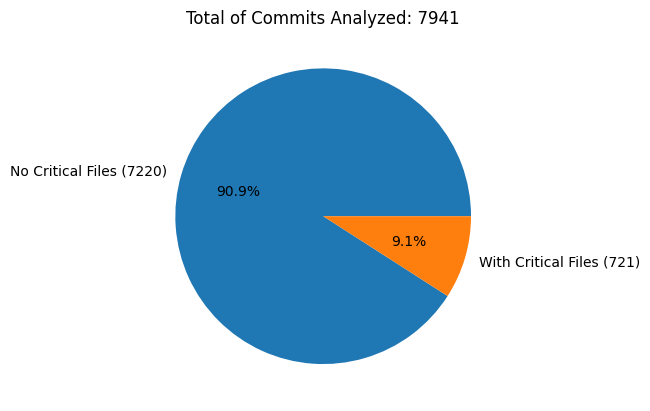

In [27]:
my_qtd_commits_to_analyze= commits_to_analyze[1]
my_commits_to_analyze = commits_to_analyze[0]
qtd_commits_with_critical_files = len(my_commits_to_analyze.keys())
qtd_commits_no_critical_files = my_qtd_commits_to_analyze - qtd_commits_with_critical_files

print(f'Total de commits analisados: {my_qtd_commits_to_analyze}')
print(f'Commits que possuem pelo menos um arquivo crítico: {qtd_commits_with_critical_files}')
print(f'Commits sem arquivos críticos: {qtd_commits_no_critical_files}')
print('\n')

plt.pie([qtd_commits_no_critical_files, qtd_commits_with_critical_files], labels=[f"No Critical Files ({qtd_commits_no_critical_files})", f"With Critical Files ({qtd_commits_with_critical_files})"], autopct="%1.1f%%")
plt.title(f"Total of Commits Analyzed: {my_qtd_commits_to_analyze}")
plt.show()

In [28]:
#2. Quantidade de commits com arquivos críticos
ve_lista_commits_com_arquivos_criticos, ve_qtd_commits_com_arquivos_criticos = commits_to_analyze[0].keys(), commits_to_analyze[1]

print(f'Quantidade de commits com arquivos críticos: {ve_qtd_commits_com_arquivos_criticos}')

Quantidade de commits com arquivos críticos: 7941


In [29]:
MESSAGE_COMMIT = 0
CRITICAL_FILES_COMMIT = 1
DATE_COMMIT = 2
LINES_COMMIT = 3
FILES_COMMIT = 4
DICT_DIFF_COMMIT = 5
MODIFIED_FILES_COMMIT = 6
DICT_MODIFIED_FILES_COMMIT = 7

l_commits_aux, l_msg_aux, l_critical_files_aux, l_date_aux, l_lines_aux, l_files_commit_aux, l_diff_commit_aux, l_modified_files_aux, l_dict_modified_files = [], [], [], [], [], [], [], [], []

dict_commits_to_analyse = commits_to_analyze[0]
for k, v in dict_commits_to_analyse.items():
  l_commits_aux.append(k)
  l_msg_aux.append(v[MESSAGE_COMMIT])
  l_critical_files_aux.append(v[CRITICAL_FILES_COMMIT])
  l_date_aux.append(v[DATE_COMMIT])
  l_lines_aux.append(v[LINES_COMMIT])
  l_files_commit_aux.append(v[FILES_COMMIT])
  l_diff_commit_aux.append(v[DICT_DIFF_COMMIT])
  l_modified_files_aux.append(v[MODIFIED_FILES_COMMIT])
  l_dict_modified_files.append(v[DICT_MODIFIED_FILES_COMMIT])

dict_commits_to_analyze_aux = {
	'commits':l_commits_aux,
	'msg': l_msg_aux,
	'critical_files': l_critical_files_aux,
  'data': l_date_aux,
	'lines': l_lines_aux,
  'files': l_files_commit_aux,
	'diff_commit': l_diff_commit_aux,
	'modified_files': l_modified_files_aux,
	'dict_modified_files': l_dict_modified_files
}

df_commits_to_analyze_aux = pd.DataFrame(dict_commits_to_analyze_aux)
df_commits_to_analyze_aux

,commits,msg,critical_files,data,lines,files,diff_commit,modified_files,dict_modified_files
0,07b6a38336a62913d42817a89cdc821a89419b7f,AMQ-2053 introduce methods to remove (closed) ...,[Queue.java],7/1/2009,164,12,"[{'Queue.java': '@@ -850,9 +850,9 @@ public cl...","[AbstractRegion.java, DestinationFactory.java,...","[@@ -203,7 +203,7 @@ public abstract class Abs..."
1,807f64591dcd4e0e496dc5795405812129d0d062,Recovery dispatch refactoring as the part of t...,"[Queue.java, QueueDispatchSelector.java]",22/1/2009,54,2,"[{'Queue.java': '@@ -233,16 +233,18 @@ public ...","[Queue.java, QueueDispatchSelector.java]","[@@ -233,16 +233,18 @@ public class Queue exte..."
2,a321204079f435deaf8d082fb3de95c5c792c7f2,fix for http://issues.apache.org/activemq/brow...,[Queue.java],23/1/2009,317,3,"[{'Queue.java': '@@ -27,12 +27,16 @@ import ja...","[Queue.java, PolicyEntry.java, MessageGroupDel...","[@@ -27,12 +27,16 @@ import java.util.LinkedLi..."
3,977393d9e74364c21260f00d2fe0e314c77f9afa,fix for http://issues.apache.org/activemq/brow...,[QueueDispatchSelector.java],23/1/2009,170,4,"[{'QueueDispatchSelector.java': '@@ -70,7 +70,...","[QueueDispatchSelector.java, JmsTestSupport.ja...","[@@ -70,7 +70,7 @@ public class QueueDispatchS..."
4,39dd6b914a6954bf8f7114e97831482fd616e8bb,fix for https://issues.apache.org/activemq/bro...,[DemandForwardingBridgeSupport.java],27/1/2009,238,4,[{'DemandForwardingBridgeSupport.java': '@@ -4...,"[DemandForwardingBridgeSupport.java, TestBroke...","[@@ -441,6 +441,9 @@ public abstract class Dem..."
...,...,...,...,...,...,...,...,...,...
716,9a5b61f6a28184cfe832871302ece16069ebb71d,[AMQ-9257] Disabled expire message checking wh...,"[Queue.java, QueueDispatchSelector.java]",19/5/2023,75,3,"[{'Queue.java': '@@ -957,6 +957,11 @@ public c...","[Queue.java, QueueDispatchSelector.java, Expir...","[@@ -957,6 +957,11 @@ public class Queue exten..."
717,901956d4ddb6a0ea9fe5fedf39732117ab68f087,AMQ-9262 - Fix network subscriptions for compo...,[DemandForwardingBridgeSupport.java],7/6/2023,619,5,[{'DemandForwardingBridgeSupport.java': '@@ -2...,"[DemandForwardingBridgeSupport.java, Composite...","[@@ -24,6 +24,7 @@ import java.util.Collection..."
718,95e3c2a1aa0d4962ad6a22a4422a9314875f824b,[AMQ-9233] Prevent NPE in SubQueueSelectorCach...,[SubQueueSelectorCacheBroker.java],22/6/2023,2,1,[{'SubQueueSelectorCacheBroker.java': '@@ -180...,[SubQueueSelectorCacheBroker.java],"[@@ -180,7 +180,7 @@ public class SubQueueSele..."
719,3ba93ed9579bbe90967312fba78726d96239110a,Remove unnecessary boxing / unboxing,"[DurableTopicSubscription.java, Queue.java]",23/7/2023,1307,111,"[{'DurableTopicSubscription.java': '@@ -227,9 ...","[InboundTransformer.java, AmqpConnection.java,...","[@@ -90,7 +90,7 @@ public abstract class Inbou..."


### Conjunto de Commits com Arquivos Críticos (by ATDCodeAnalyzer)

In [30]:
list_comits_with_critical_files = df_commits_to_analyze_aux.commits.to_list()
print('Commits com Arquivos Críticos (by ATDCodeAnalyzer)')
print(f'{len(list_comits_with_critical_files)}, {list_comits_with_critical_files}')
print('\n')
print('Convert list_comits_with_critical_files para um conjunto de commits')
set_comits_with_critical_files = set(list_comits_with_critical_files)

Commits com Arquivos Críticos (by ATDCodeAnalyzer)
721, ['07b6a38336a62913d42817a89cdc821a89419b7f', '807f64591dcd4e0e496dc5795405812129d0d062', 'a321204079f435deaf8d082fb3de95c5c792c7f2', '977393d9e74364c21260f00d2fe0e314c77f9afa', '39dd6b914a6954bf8f7114e97831482fd616e8bb', '2bda17a6b0075ffbe397c6d3b62ebdc2810c1683', '3b08860f10a12b8753e24756cf66f4a8d66b270e', '51f68fb11017845ca1e01c657f7b927a2ca359a9', '1ab76f775d4cade018f16f970b93b5ee9d77ac8f', '9f8777d3a03806be5ce02494496418eeb93f921d', '9ad6c089faf923cf92421cab51cd42f2f0a33d55', '9216c18c73e3bf5d755dff963750f08106423b56', '184761a119ae684a910bed41bc0f81bc2334fdb4', '2de531cb5209e0aa8ce46f18379619352583f6ba', 'f54713a7b36e7410702ab686ff02a8db262af527', 'f9d5449f47c2067dfe9606133d085ea5e0da734d', '08aecbee6e9754e696f3bdf64634263dc73cb5c5', '31c7e620c272d97bf3839f584e5deb133e5da23a', '132f662209f7e25a1d9c240fdddcf61e0ed1226c', 'e45bb0690764746dc2f6ae66d3b55efa873b4592', '21cd3e69c61783a2a0b2ee3c0ae39f16c67fa8c8', '5511217fb154d10654

## 5.4 Commits contendo SATD Keywords e contendo Arquivos Críticos

Faz a intersecção entre commits com SATD keywords e commits com arquivos críticos

In [31]:
set_commits_with_satd_keywords_and_critical_files = set_comits_with_critical_files.intersection(set_list_commit_with_satd_keywords)
list_commits_with_satd_keywords_and_critical_files = list(set_commits_with_satd_keywords_and_critical_files)

df_commits_with_satd_keywords1 = df_commit_diffs_aux[df_commit_diffs_aux['commits'].isin(list_commits_with_satd_keywords_and_critical_files)]

df_commits_with_satd_keywords1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 14 to 102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   commits   10 non-null     object
 1   keywords  10 non-null     object
 2   comments  10 non-null     object
dtypes: object(3)
memory usage: 320.0+ bytes


In [32]:
df_commits_with_satd_keywords1

,commits,keywords,comments
14,960e65df6560a2fc1e9276e5cedf335817590073,"[TODO, TODO, TODO]","[ // TODO Auto-generated method stub, ..."
17,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,[TODO],[ * TODO]
19,c7c8e5367e9e7b75bc12eb11fcbf189655340ccb,"[TODO, TODO]","[ // TODO Auto-generated method stub, ..."
26,42ee51fe9abe67712921ddb6ec296b8551aed2b0,[TODO],[ // TODO need two send a 2nd messa...
36,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,[TODO],[ // TODO: when the slave becomes a mas...
41,0b01996efb0e1866415a8bee694daafd684b6ca8,[TODO],[ // TODO: Should we not remove the ser...
44,c6595066e9d73f8201264ccd28183f989fe53f90,[TODO],[ // TODO: This value of 10 seconds see...
46,a80acbb1ad4e26987a7ff82c587e4bb6a81d15f2,"[FIX, FIXME]",[ // FIXME: disable JMX listing of LDAP...
73,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,[TODO],[ // TODO]
102,3953b9aaefaee914bdd0702f27aef47c021ceb27,[TODO],[ // TODO Auto-generated method stub]


In [33]:
df_commits_with_satd_keywords2 = df_commits_to_analyze_aux[df_commits_to_analyze_aux['commits'].isin(list_commits_with_satd_keywords_and_critical_files)]
df_commits_with_satd_keywords2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 62 to 577
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   commits              10 non-null     object
 1   msg                  10 non-null     object
 2   critical_files       10 non-null     object
 3   data                 10 non-null     object
 4   lines                10 non-null     int64 
 5   files                10 non-null     int64 
 6   diff_commit          10 non-null     object
 7   modified_files       10 non-null     object
 8   dict_modified_files  10 non-null     object
dtypes: int64(2), object(7)
memory usage: 800.0+ bytes


In [34]:
df_commits_with_satd_keywords2

,commits,msg,critical_files,data,lines,files,diff_commit,modified_files,dict_modified_files
62,960e65df6560a2fc1e9276e5cedf335817590073,Apply patch for https://issues.apache.org/acti...,[Queue.java],25/9/2009,311,2,"[{'Queue.java': '@@ -1339,15 +1339,13 @@ publi...","[Queue.java, AMQ2413Test.java]","[@@ -1339,15 +1339,13 @@ public class Queue ex..."
89,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,Fix for https://issues.apache.org/activemq/bro...,[BrokerService.java],3/2/2010,392,20,"[{'BrokerService.java': '@@ -1418,7 +1418,7 @@...","[ActiveMQConnection.java, AdvisoryBroker.java,...","[@@ -33,7 +33,6 @@ import java.util.concurrent..."
90,c7c8e5367e9e7b75bc12eb11fcbf189655340ccb,Added JMX support for JobScheduling\n\ngit-svn...,[BrokerService.java],6/2/2010,916,17,"[{'BrokerService.java': '@@ -45,6 +45,8 @@ imp...","[ScheduledMessage.java, BrokerService.java, Br...","[@@ -29,6 +29,10 @@ public interface Scheduled..."
129,42ee51fe9abe67712921ddb6ec296b8551aed2b0,Applied patch for https://issues.apache.org/ac...,[Queue.java],4/7/2010,284,4,"[{'Queue.java': '@@ -116,6 +116,7 @@ public cl...","[Queue.java, PolicyEntry.java, ExclusiveConsum...","[@@ -116,6 +116,7 @@ public class Queue extend..."
270,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,fix for: https://issues.apache.org/jira/browse...,"[DurableTopicSubscription.java, Queue.java]",5/3/2012,420,4,"[{'DurableTopicSubscription.java': '@@ -61,7 +...","[DurableTopicSubscription.java, PrefetchSubscr...","[@@ -61,7 +61,7 @@ public class DurableTopicSu..."
309,0b01996efb0e1866415a8bee694daafd684b6ca8,AMQ-3451: Statis default thread pools is @depr...,[DemandForwardingBridgeSupport.java],5/9/2012,54,4,[{'DemandForwardingBridgeSupport.java': '@@ -7...,"[DemandForwardingBridgeSupport.java, DefaultTh...","[@@ -70,7 +70,6 @@ import org.apache.activemq...."
319,c6595066e9d73f8201264ccd28183f989fe53f90,AMQ-4067: Prefix thread names with ActiveMQ\n\...,[BrokerService.java],20/9/2012,38,2,"[{'BrokerService.java': '@@ -1181,7 +1181,7 @@...","[BrokerService.java, AbstractInactivityMonitor...","[@@ -1181,7 +1181,7 @@ public class BrokerServ..."
324,a80acbb1ad4e26987a7ff82c587e4bb6a81d15f2,"Polish the code, remove warnings fix spelling ...",[DemandForwardingBridgeSupport.java],28/9/2012,1111,17,[{'DemandForwardingBridgeSupport.java': '@@ -1...,"[CompositeDemandForwardingBridge.java, Conditi...","[@@ -16,23 +16,17 @@\n */\n package org.apach..."
394,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,fix for: https://issues.apache.org/jira/browse...,[QueueBrowserSubscription.java],5/6/2013,56,3,"[{'QueueBrowserSubscription.java': '@@ -19,12 ...","[QueueBrowserSubscription.java, PolicyEntry.ja...","[@@ -19,12 +19,11 @@ package org.apache.active..."
577,3953b9aaefaee914bdd0702f27aef47c021ceb27,https://issues.apache.org/jira/browse/AMQ-6373...,[DemandForwardingBridgeSupport.java],25/7/2016,10366,75,[{'DemandForwardingBridgeSupport.java': '@@ -5...,"[TransportConnection.java, DemandForwardingBri...","[@@ -20,6 +20,7 @@ import java.io.EOFException..."


In [35]:
df_commits_with_satd_keywords_with_critical_files = df_commits_with_satd_keywords1.merge(df_commits_with_satd_keywords2, on='commits', how='outer')

colunas_ok = ['commits', 'data', 'msg', 'lines', 'files', 'critical_files', 'keywords', 'comments',
       'diff_commit', 'modified_files','dict_modified_files']

df_commits_with_satd_keywords_with_critical_files = df_commits_with_satd_keywords_with_critical_files[colunas_ok]
df_commits_with_satd_keywords_with_critical_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   commits              10 non-null     object
 1   data                 10 non-null     object
 2   msg                  10 non-null     object
 3   lines                10 non-null     int64 
 4   files                10 non-null     int64 
 5   critical_files       10 non-null     object
 6   keywords             10 non-null     object
 7   comments             10 non-null     object
 8   diff_commit          10 non-null     object
 9   modified_files       10 non-null     object
 10  dict_modified_files  10 non-null     object
dtypes: int64(2), object(9)
memory usage: 960.0+ bytes


In [36]:
df_commits_with_satd_keywords_with_critical_files

,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,960e65df6560a2fc1e9276e5cedf335817590073,25/9/2009,Apply patch for https://issues.apache.org/acti...,311,2,[Queue.java],"[TODO, TODO, TODO]","[ // TODO Auto-generated method stub, ...","[{'Queue.java': '@@ -1339,15 +1339,13 @@ publi...","[Queue.java, AMQ2413Test.java]","[@@ -1339,15 +1339,13 @@ public class Queue ex..."
1,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,3/2/2010,Fix for https://issues.apache.org/activemq/bro...,392,20,[BrokerService.java],[TODO],[ * TODO],"[{'BrokerService.java': '@@ -1418,7 +1418,7 @@...","[ActiveMQConnection.java, AdvisoryBroker.java,...","[@@ -33,7 +33,6 @@ import java.util.concurrent..."
2,c7c8e5367e9e7b75bc12eb11fcbf189655340ccb,6/2/2010,Added JMX support for JobScheduling\n\ngit-svn...,916,17,[BrokerService.java],"[TODO, TODO]","[ // TODO Auto-generated method stub, ...","[{'BrokerService.java': '@@ -45,6 +45,8 @@ imp...","[ScheduledMessage.java, BrokerService.java, Br...","[@@ -29,6 +29,10 @@ public interface Scheduled..."
3,42ee51fe9abe67712921ddb6ec296b8551aed2b0,4/7/2010,Applied patch for https://issues.apache.org/ac...,284,4,[Queue.java],[TODO],[ // TODO need two send a 2nd messa...,"[{'Queue.java': '@@ -116,6 +116,7 @@ public cl...","[Queue.java, PolicyEntry.java, ExclusiveConsum...","[@@ -116,6 +116,7 @@ public class Queue extend..."
4,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,5/3/2012,fix for: https://issues.apache.org/jira/browse...,420,4,"[DurableTopicSubscription.java, Queue.java]",[TODO],[ // TODO: when the slave becomes a mas...,"[{'DurableTopicSubscription.java': '@@ -61,7 +...","[DurableTopicSubscription.java, PrefetchSubscr...","[@@ -61,7 +61,7 @@ public class DurableTopicSu..."
5,0b01996efb0e1866415a8bee694daafd684b6ca8,5/9/2012,AMQ-3451: Statis default thread pools is @depr...,54,4,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO: Should we not remove the ser...,[{'DemandForwardingBridgeSupport.java': '@@ -7...,"[DemandForwardingBridgeSupport.java, DefaultTh...","[@@ -70,7 +70,6 @@ import org.apache.activemq...."
6,c6595066e9d73f8201264ccd28183f989fe53f90,20/9/2012,AMQ-4067: Prefix thread names with ActiveMQ\n\...,38,2,[BrokerService.java],[TODO],[ // TODO: This value of 10 seconds see...,"[{'BrokerService.java': '@@ -1181,7 +1181,7 @@...","[BrokerService.java, AbstractInactivityMonitor...","[@@ -1181,7 +1181,7 @@ public class BrokerServ..."
7,a80acbb1ad4e26987a7ff82c587e4bb6a81d15f2,28/9/2012,"Polish the code, remove warnings fix spelling ...",1111,17,[DemandForwardingBridgeSupport.java],"[FIX, FIXME]",[ // FIXME: disable JMX listing of LDAP...,[{'DemandForwardingBridgeSupport.java': '@@ -1...,"[CompositeDemandForwardingBridge.java, Conditi...","[@@ -16,23 +16,17 @@\n */\n package org.apach..."
8,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,5/6/2013,fix for: https://issues.apache.org/jira/browse...,56,3,[QueueBrowserSubscription.java],[TODO],[ // TODO],"[{'QueueBrowserSubscription.java': '@@ -19,12 ...","[QueueBrowserSubscription.java, PolicyEntry.ja...","[@@ -19,12 +19,11 @@ package org.apache.active..."
9,3953b9aaefaee914bdd0702f27aef47c021ceb27,25/7/2016,https://issues.apache.org/jira/browse/AMQ-6373...,10366,75,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO Auto-generated method stub],[{'DemandForwardingBridgeSupport.java': '@@ -5...,"[TransportConnection.java, DemandForwardingBri...","[@@ -20,6 +20,7 @@ import java.io.EOFException..."


In [37]:
round(df_commits_with_satd_keywords_with_critical_files.describe(), 2)

,lines,files
count,10.00,10.00
mean,1394.80,14.80
std,3172.58,22.30
min,38.00,2.00
25%,113.00,3.25
50%,351.50,4.00
75%,792.00,17.00
max,10366.00,75.00


Total de commits analisados: 7941
Commits que possuem pelo menos um arquivo crítico: 721
Qtd de commits sem SATD e sem arquivos críticos: 7931
Qtd de commits com SATD e arquivos críticos: 10




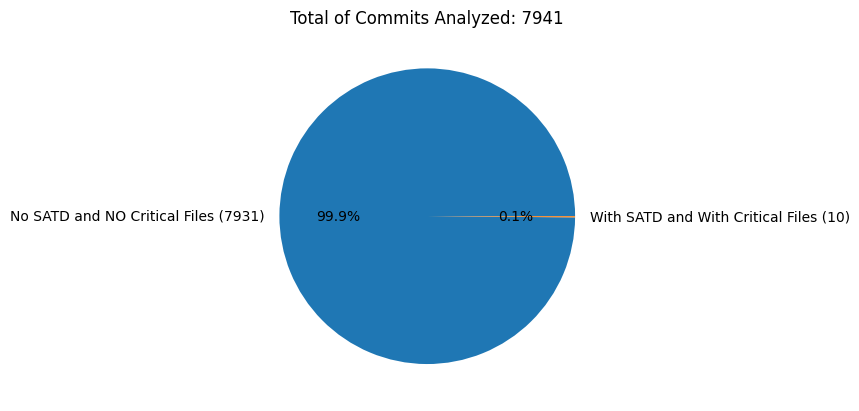

In [38]:
qtd_commits_with_satd_and_critical_files = len(df_commits_with_satd_keywords_with_critical_files.commits.to_list())
qtd_commits_no_satd_no_critical_files = my_qtd_commits_to_analyze - qtd_commits_with_satd_and_critical_files

# Dos x commits com arquivos criticos quantos tem SATD?
print(f'Total de commits analisados: {my_qtd_commits_to_analyze}')
print(f'Commits que possuem pelo menos um arquivo crítico: {qtd_commits_with_critical_files}')
print(f'Qtd de commits sem SATD e sem arquivos críticos: {qtd_commits_no_satd_no_critical_files}')
print(f'Qtd de commits com SATD e arquivos críticos: {qtd_commits_with_satd_and_critical_files}')
print(f'\n')

plt.pie([qtd_commits_no_satd_no_critical_files, qtd_commits_with_satd_and_critical_files], labels=[f"No SATD and NO Critical Files ({qtd_commits_no_satd_no_critical_files})", f"With SATD and With Critical Files ({qtd_commits_with_satd_and_critical_files})"], autopct="%1.1f%%")
plt.title(f"Total of Commits Analyzed: {my_qtd_commits_to_analyze}")
plt.show()

In [39]:
print('Salva o dataframe de df_commits_with_satd_keywords_with_critical_files em uma planilha excel')
df_commits_with_satd_keywords_with_critical_files.to_excel('activemq_commits_with_satd_keywords_with_critical_files.xlsx')

Salva o dataframe de df_commits_with_satd_keywords_with_critical_files em uma planilha excel


# 6. Analyzes Jira issues

## 6.1 Configures the instance, project and date range

In [43]:
# Initialize the Jira connection
print('Initialize the Jira connection')
jira = JIRA(JIRA_SERVER, basic_auth=(username, password))

# Create a JiraUtils instance
print('Create a JiraUtils instance')
jira_utils = JiraUtils('AMQ', jira)
# 2011, 8, 1
date1 = (2009, 1, 1)
date2 = (2023, 10, 4)
distance = 90
print('Define date intervals')
print(f'From: {str(date1)} to: {date2}, by: {distance} days of distance.')

Initialize the Jira connection
Create a JiraUtils instance
Define date intervals
From: (2009, 1, 1) to: (2023, 10, 4), by: 90 days of distance.


## 6.2 Retrieves all blocks of issues in range of dates

In [44]:
# Fetch issues using date intervals
print('Fetch issues using date intervals')
block_of_issues = jira_utils.get_list_of_block_issues_by_dates(date1, date2, distance)

Fetch issues using date intervals
Aguarde...


Progress Message Analysis:   2%|▏         | 1/60 [00:02<02:09,  2.20s/it]

Range: project=AMQ and created>="2009/01/01" and created<="2009/03/31", qtd issues: 138


Progress Message Analysis:   3%|▎         | 2/60 [00:03<01:42,  1.77s/it]

Range: project=AMQ and created>="2009/04/01" and created<="2009/06/29", qtd issues: 120


Progress Message Analysis:   5%|▌         | 3/60 [00:05<01:35,  1.67s/it]

Range: project=AMQ and created>="2009/06/30" and created<="2009/09/27", qtd issues: 113


Progress Message Analysis:   7%|▋         | 4/60 [00:06<01:35,  1.70s/it]

Range: project=AMQ and created>="2009/09/28" and created<="2009/12/26", qtd issues: 125


Progress Message Analysis:   8%|▊         | 5/60 [00:08<01:30,  1.65s/it]

Range: project=AMQ and created>="2009/12/27" and created<="2010/03/26", qtd issues: 120


Progress Message Analysis:  10%|█         | 6/60 [00:10<01:30,  1.67s/it]

Range: project=AMQ and created>="2010/03/27" and created<="2010/06/24", qtd issues: 119


Progress Message Analysis:  12%|█▏        | 7/60 [00:12<01:34,  1.79s/it]

Range: project=AMQ and created>="2010/06/25" and created<="2010/09/22", qtd issues: 131


Progress Message Analysis:  13%|█▎        | 8/60 [00:14<01:42,  1.97s/it]

Range: project=AMQ and created>="2010/09/23" and created<="2010/12/21", qtd issues: 164


Progress Message Analysis:  15%|█▌        | 9/60 [00:16<01:36,  1.90s/it]

Range: project=AMQ and created>="2010/12/22" and created<="2011/03/21", qtd issues: 129


Progress Message Analysis:  17%|█▋        | 10/60 [00:18<01:31,  1.84s/it]

Range: project=AMQ and created>="2011/03/22" and created<="2011/06/19", qtd issues: 128


Progress Message Analysis:  18%|█▊        | 11/60 [00:19<01:29,  1.83s/it]

Range: project=AMQ and created>="2011/06/20" and created<="2011/09/17", qtd issues: 128


Progress Message Analysis:  20%|██        | 12/60 [00:21<01:26,  1.80s/it]

Range: project=AMQ and created>="2011/09/18" and created<="2011/12/16", qtd issues: 134


Progress Message Analysis:  22%|██▏       | 13/60 [00:23<01:22,  1.75s/it]

Range: project=AMQ and created>="2011/12/17" and created<="2012/03/15", qtd issues: 129


Progress Message Analysis:  23%|██▎       | 14/60 [00:25<01:22,  1.78s/it]

Range: project=AMQ and created>="2012/03/16" and created<="2012/06/13", qtd issues: 109


Progress Message Analysis:  25%|██▌       | 15/60 [00:27<01:25,  1.90s/it]

Range: project=AMQ and created>="2012/06/14" and created<="2012/09/11", qtd issues: 155


Progress Message Analysis:  27%|██▋       | 16/60 [00:29<01:28,  2.02s/it]

Range: project=AMQ and created>="2012/09/12" and created<="2012/12/10", qtd issues: 170


Progress Message Analysis:  28%|██▊       | 17/60 [00:31<01:25,  2.00s/it]

Range: project=AMQ and created>="2012/12/11" and created<="2013/03/10", qtd issues: 147


Progress Message Analysis:  30%|███       | 18/60 [00:33<01:28,  2.12s/it]

Range: project=AMQ and created>="2013/03/11" and created<="2013/06/08", qtd issues: 177


Progress Message Analysis:  32%|███▏      | 19/60 [00:35<01:21,  1.98s/it]

Range: project=AMQ and created>="2013/06/09" and created<="2013/09/06", qtd issues: 131


Progress Message Analysis:  33%|███▎      | 20/60 [00:38<01:25,  2.13s/it]

Range: project=AMQ and created>="2013/09/07" and created<="2013/12/05", qtd issues: 194


Progress Message Analysis:  35%|███▌      | 21/60 [00:40<01:23,  2.15s/it]

Range: project=AMQ and created>="2013/12/06" and created<="2014/03/05", qtd issues: 154


Progress Message Analysis:  37%|███▋      | 22/60 [00:42<01:18,  2.06s/it]

Range: project=AMQ and created>="2014/03/06" and created<="2014/06/03", qtd issues: 120


Progress Message Analysis:  38%|███▊      | 23/60 [00:43<01:13,  1.99s/it]

Range: project=AMQ and created>="2014/06/04" and created<="2014/09/01", qtd issues: 131


Progress Message Analysis:  40%|████      | 24/60 [00:45<01:06,  1.86s/it]

Range: project=AMQ and created>="2014/09/02" and created<="2014/11/30", qtd issues: 120


Progress Message Analysis:  42%|████▏     | 25/60 [00:47<01:08,  1.96s/it]

Range: project=AMQ and created>="2014/12/01" and created<="2015/02/28", qtd issues: 158


Progress Message Analysis:  43%|████▎     | 26/60 [00:50<01:12,  2.12s/it]

Range: project=AMQ and created>="2015/03/01" and created<="2015/05/29", qtd issues: 190


Progress Message Analysis:  45%|████▌     | 27/60 [00:52<01:07,  2.06s/it]

Range: project=AMQ and created>="2015/05/30" and created<="2015/08/27", qtd issues: 134


Progress Message Analysis:  47%|████▋     | 28/60 [00:53<01:00,  1.88s/it]

Range: project=AMQ and created>="2015/08/28" and created<="2015/11/25", qtd issues: 104


Progress Message Analysis:  48%|████▊     | 29/60 [00:55<00:56,  1.82s/it]

Range: project=AMQ and created>="2015/11/26" and created<="2016/02/23", qtd issues: 115


Progress Message Analysis:  50%|█████     | 30/60 [00:57<00:54,  1.81s/it]

Range: project=AMQ and created>="2016/02/24" and created<="2016/05/23", qtd issues: 112


Progress Message Analysis:  52%|█████▏    | 31/60 [00:58<00:48,  1.67s/it]

Range: project=AMQ and created>="2016/05/24" and created<="2016/08/21", qtd issues: 97


Progress Message Analysis:  53%|█████▎    | 32/60 [01:00<00:47,  1.71s/it]

Range: project=AMQ and created>="2016/08/22" and created<="2016/11/19", qtd issues: 109


Progress Message Analysis:  55%|█████▌    | 33/60 [01:01<00:41,  1.54s/it]

Range: project=AMQ and created>="2016/11/20" and created<="2017/02/17", qtd issues: 88


Progress Message Analysis:  57%|█████▋    | 34/60 [01:02<00:35,  1.37s/it]

Range: project=AMQ and created>="2017/02/18" and created<="2017/05/18", qtd issues: 70


Progress Message Analysis:  58%|█████▊    | 35/60 [01:03<00:33,  1.34s/it]

Range: project=AMQ and created>="2017/05/19" and created<="2017/08/16", qtd issues: 67


Progress Message Analysis:  60%|██████    | 36/60 [01:04<00:29,  1.21s/it]

Range: project=AMQ and created>="2017/08/17" and created<="2017/11/14", qtd issues: 66


Progress Message Analysis:  62%|██████▏   | 37/60 [01:05<00:23,  1.04s/it]

Range: project=AMQ and created>="2017/11/15" and created<="2018/02/12", qtd issues: 35


Progress Message Analysis:  63%|██████▎   | 38/60 [01:05<00:21,  1.01it/s]

Range: project=AMQ and created>="2018/02/13" and created<="2018/05/13", qtd issues: 58


Progress Message Analysis:  65%|██████▌   | 39/60 [01:06<00:20,  1.00it/s]

Range: project=AMQ and created>="2018/05/14" and created<="2018/08/11", qtd issues: 75


Progress Message Analysis:  67%|██████▋   | 40/60 [01:07<00:19,  1.01it/s]

Range: project=AMQ and created>="2018/08/12" and created<="2018/11/09", qtd issues: 62


Progress Message Analysis:  68%|██████▊   | 41/60 [01:08<00:17,  1.08it/s]

Range: project=AMQ and created>="2018/11/10" and created<="2019/02/07", qtd issues: 51


Progress Message Analysis:  70%|███████   | 42/60 [01:09<00:14,  1.20it/s]

Range: project=AMQ and created>="2019/02/08" and created<="2019/05/08", qtd issues: 46


Progress Message Analysis:  72%|███████▏  | 43/60 [01:10<00:14,  1.17it/s]

Range: project=AMQ and created>="2019/05/09" and created<="2019/08/06", qtd issues: 59


Progress Message Analysis:  73%|███████▎  | 44/60 [01:11<00:15,  1.06it/s]

Range: project=AMQ and created>="2019/08/07" and created<="2019/11/04", qtd issues: 65


Progress Message Analysis:  75%|███████▌  | 45/60 [01:12<00:13,  1.08it/s]

Range: project=AMQ and created>="2019/11/05" and created<="2020/02/02", qtd issues: 59


Progress Message Analysis:  77%|███████▋  | 46/60 [01:13<00:14,  1.01s/it]

Range: project=AMQ and created>="2020/02/03" and created<="2020/05/02", qtd issues: 77


Progress Message Analysis:  78%|███████▊  | 47/60 [01:14<00:12,  1.07it/s]

Range: project=AMQ and created>="2020/05/03" and created<="2020/07/31", qtd issues: 46


Progress Message Analysis:  80%|████████  | 48/60 [01:14<00:10,  1.17it/s]

Range: project=AMQ and created>="2020/08/01" and created<="2020/10/29", qtd issues: 37


Progress Message Analysis:  82%|████████▏ | 49/60 [01:15<00:09,  1.19it/s]

Range: project=AMQ and created>="2020/10/30" and created<="2021/01/27", qtd issues: 55


Progress Message Analysis:  83%|████████▎ | 50/60 [01:16<00:08,  1.15it/s]

Range: project=AMQ and created>="2021/01/28" and created<="2021/04/27", qtd issues: 63


Progress Message Analysis:  85%|████████▌ | 51/60 [01:17<00:08,  1.11it/s]

Range: project=AMQ and created>="2021/04/28" and created<="2021/07/26", qtd issues: 66


Progress Message Analysis:  87%|████████▋ | 52/60 [01:18<00:07,  1.14it/s]

Range: project=AMQ and created>="2021/07/27" and created<="2021/10/24", qtd issues: 53


Progress Message Analysis:  88%|████████▊ | 53/60 [01:19<00:05,  1.23it/s]

Range: project=AMQ and created>="2021/10/25" and created<="2022/01/22", qtd issues: 32


Progress Message Analysis:  90%|█████████ | 54/60 [01:21<00:07,  1.18s/it]

Range: project=AMQ and created>="2022/01/23" and created<="2022/04/22", qtd issues: 96


Progress Message Analysis:  92%|█████████▏| 55/60 [01:22<00:05,  1.13s/it]

Range: project=AMQ and created>="2022/04/23" and created<="2022/07/21", qtd issues: 59


Progress Message Analysis:  93%|█████████▎| 56/60 [01:23<00:04,  1.13s/it]

Range: project=AMQ and created>="2022/07/22" and created<="2022/10/19", qtd issues: 69


Progress Message Analysis:  95%|█████████▌| 57/60 [01:23<00:02,  1.01it/s]

Range: project=AMQ and created>="2022/10/20" and created<="2023/01/17", qtd issues: 39


Progress Message Analysis:  97%|█████████▋| 58/60 [01:24<00:01,  1.09it/s]

Range: project=AMQ and created>="2023/01/18" and created<="2023/04/17", qtd issues: 44


Progress Message Analysis:  98%|█████████▊| 59/60 [01:25<00:00,  1.17it/s]

Range: project=AMQ and created>="2023/04/18" and created<="2023/07/16", qtd issues: 43


Progress Message Analysis: 100%|██████████| 60/60 [01:26<00:00,  1.44s/it]

Range: project=AMQ and created>="2023/07/17" and created<="2023/10/14", qtd issues: 40
2023-11-13 21:23:42.676295
Tempo da consulta: 0:01:26.135821


In [45]:
# Concatenate the block of issues into a single list
print('Concatenate the block of issues into a single list')
all_issues = jira_utils.concatenate_block_of_issues(block_of_issues)

Concatenate the block of issues into a single list
Total de issues recuperados: 5925


In [46]:
#3. Quantidade total de issues analisados
ve_qtd_total_issues = len(all_issues)
ve_lista_com_todos_os_issues = []
for issue in all_issues:
  ve_lista_com_todos_os_issues.append(issue.key)

In [47]:
project = 'AMQ'

# Fetch 'all_issues' from your Jira server

# Call the function to analyze Jira issues for SATD
my_jira_issues = analyze_jira_all_issues(project, all_issues)

Progress jira all issues analysis: 100%|██████████| 5925/5925 [00:00<00:00, 123916.72it/s]


## 6.3 Filtra issues que também aparecem nos commits com arquivos críticos

In [48]:
def find_issues_id_by_project(input_string: str, project: str) -> list[str]:
    """Finds all Cassandra issue ID patterns in the input string.
    Args:
        input_string: The input string.
        project: The pattern related to project name, for example: CASSANDRA project name
    Returns:
        A list of project issue IDs, if found; otherwise, an empty list.
    """
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r"({0}-\d+)".format(project), input_string)
    # Return an empty list if no matches are found
    if not matches:
        return []
    # Convert the list of matches to a set to remove duplicates
    set_matches = set(matches)
    # Convert the set of matches back to a list
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

In [50]:
dict_issues_in_commits = {}
for index in df_commits_with_satd_keywords_with_critical_files.index:
  l_issues_in_commit = find_issues_id_by_project(input_string=df_commits_with_satd_keywords_with_critical_files.msg[index], project='AMQ')
  if len(l_issues_in_commit) > 0:
    commit_hash = df_commits_with_satd_keywords_with_critical_files.commits[index]
    dict_issues_in_commits[commit_hash] = l_issues_in_commit

print(f'Existem {len(dict_issues_in_commits)} issues que foram registrados nos commits. ')

Existem 8 issues que foram registrados nos commits. 


### Relação de issues e aparecem nos commits com arquivos críticos

In [51]:
dict_issues_in_commits_aux = {}
l_issues_in_commits, l_issues_issues_in_commits= [], []

print('Commits que possuem issues registrados em suas mensagens: ')
for k, v in dict_issues_in_commits.items():
  l_issues_in_commits.append(k)
  l_issues_issues_in_commits.append(v)

dict_issues_in_commits_aux = {
    'commits':l_issues_in_commits,
    'issues_ids':l_issues_issues_in_commits
}

df_issues_in_commits_aux = pd.DataFrame(dict_issues_in_commits_aux)
df_issues_in_commits_aux

Commits que possuem issues registrados em suas mensagens: 


,commits,issues_ids
0,960e65df6560a2fc1e9276e5cedf335817590073,[AMQ-2413]
1,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,[AMQ-2571]
2,42ee51fe9abe67712921ddb6ec296b8551aed2b0,[AMQ-2795]
3,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,[AMQ-3732]
4,0b01996efb0e1866415a8bee694daafd684b6ca8,[AMQ-3451]
5,c6595066e9d73f8201264ccd28183f989fe53f90,[AMQ-4067]
6,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,"[AMQ-4372, AMQ-4487]"
7,3953b9aaefaee914bdd0702f27aef47c021ceb27,[AMQ-6373]


In [52]:
lista_issues_in_commits_with_critical_files = df_issues_in_commits_aux.commits.to_list()
print(lista_issues_in_commits_with_critical_files)

['960e65df6560a2fc1e9276e5cedf335817590073', '204f91f9355130f8b6d6edd9d9d701e30cff5ea8', '42ee51fe9abe67712921ddb6ec296b8551aed2b0', '3a5b48a4db6bd3b31d7ee895023cd0181e482fa7', '0b01996efb0e1866415a8bee694daafd684b6ca8', 'c6595066e9d73f8201264ccd28183f989fe53f90', '1f5694ed60041d3b75fcb77070bdf1dae4996bd6', '3953b9aaefaee914bdd0702f27aef47c021ceb27']


In [54]:
df_commits_with_satd_keywords_with_critical_files_with_issues = df_commits_with_satd_keywords_with_critical_files[df_commits_with_satd_keywords_with_critical_files.commits.isin(lista_issues_in_commits_with_critical_files)]
df_commits_with_satd_keywords_with_critical_files_with_issues

,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,960e65df6560a2fc1e9276e5cedf335817590073,25/9/2009,Apply patch for https://issues.apache.org/acti...,311,2,[Queue.java],"[TODO, TODO, TODO]","[ // TODO Auto-generated method stub, ...","[{'Queue.java': '@@ -1339,15 +1339,13 @@ publi...","[Queue.java, AMQ2413Test.java]","[@@ -1339,15 +1339,13 @@ public class Queue ex..."
1,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,3/2/2010,Fix for https://issues.apache.org/activemq/bro...,392,20,[BrokerService.java],[TODO],[ * TODO],"[{'BrokerService.java': '@@ -1418,7 +1418,7 @@...","[ActiveMQConnection.java, AdvisoryBroker.java,...","[@@ -33,7 +33,6 @@ import java.util.concurrent..."
3,42ee51fe9abe67712921ddb6ec296b8551aed2b0,4/7/2010,Applied patch for https://issues.apache.org/ac...,284,4,[Queue.java],[TODO],[ // TODO need two send a 2nd messa...,"[{'Queue.java': '@@ -116,6 +116,7 @@ public cl...","[Queue.java, PolicyEntry.java, ExclusiveConsum...","[@@ -116,6 +116,7 @@ public class Queue extend..."
4,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,5/3/2012,fix for: https://issues.apache.org/jira/browse...,420,4,"[DurableTopicSubscription.java, Queue.java]",[TODO],[ // TODO: when the slave becomes a mas...,"[{'DurableTopicSubscription.java': '@@ -61,7 +...","[DurableTopicSubscription.java, PrefetchSubscr...","[@@ -61,7 +61,7 @@ public class DurableTopicSu..."
5,0b01996efb0e1866415a8bee694daafd684b6ca8,5/9/2012,AMQ-3451: Statis default thread pools is @depr...,54,4,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO: Should we not remove the ser...,[{'DemandForwardingBridgeSupport.java': '@@ -7...,"[DemandForwardingBridgeSupport.java, DefaultTh...","[@@ -70,7 +70,6 @@ import org.apache.activemq...."
6,c6595066e9d73f8201264ccd28183f989fe53f90,20/9/2012,AMQ-4067: Prefix thread names with ActiveMQ\n\...,38,2,[BrokerService.java],[TODO],[ // TODO: This value of 10 seconds see...,"[{'BrokerService.java': '@@ -1181,7 +1181,7 @@...","[BrokerService.java, AbstractInactivityMonitor...","[@@ -1181,7 +1181,7 @@ public class BrokerServ..."
8,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,5/6/2013,fix for: https://issues.apache.org/jira/browse...,56,3,[QueueBrowserSubscription.java],[TODO],[ // TODO],"[{'QueueBrowserSubscription.java': '@@ -19,12 ...","[QueueBrowserSubscription.java, PolicyEntry.ja...","[@@ -19,12 +19,11 @@ package org.apache.active..."
9,3953b9aaefaee914bdd0702f27aef47c021ceb27,25/7/2016,https://issues.apache.org/jira/browse/AMQ-6373...,10366,75,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO Auto-generated method stub],[{'DemandForwardingBridgeSupport.java': '@@ -5...,"[TransportConnection.java, DemandForwardingBri...","[@@ -20,6 +20,7 @@ import java.io.EOFException..."


In [55]:
df_issues_in_commits_with_critical_classes_kl_satd = pd.merge(df_commits_with_satd_keywords_with_critical_files_with_issues, df_issues_in_commits_aux, how='inner')
df_issues_in_commits_with_critical_classes_kl_satd

,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files,issues_ids
0,960e65df6560a2fc1e9276e5cedf335817590073,25/9/2009,Apply patch for https://issues.apache.org/acti...,311,2,[Queue.java],"[TODO, TODO, TODO]","[ // TODO Auto-generated method stub, ...","[{'Queue.java': '@@ -1339,15 +1339,13 @@ publi...","[Queue.java, AMQ2413Test.java]","[@@ -1339,15 +1339,13 @@ public class Queue ex...",[AMQ-2413]
1,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,3/2/2010,Fix for https://issues.apache.org/activemq/bro...,392,20,[BrokerService.java],[TODO],[ * TODO],"[{'BrokerService.java': '@@ -1418,7 +1418,7 @@...","[ActiveMQConnection.java, AdvisoryBroker.java,...","[@@ -33,7 +33,6 @@ import java.util.concurrent...",[AMQ-2571]
2,42ee51fe9abe67712921ddb6ec296b8551aed2b0,4/7/2010,Applied patch for https://issues.apache.org/ac...,284,4,[Queue.java],[TODO],[ // TODO need two send a 2nd messa...,"[{'Queue.java': '@@ -116,6 +116,7 @@ public cl...","[Queue.java, PolicyEntry.java, ExclusiveConsum...","[@@ -116,6 +116,7 @@ public class Queue extend...",[AMQ-2795]
3,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,5/3/2012,fix for: https://issues.apache.org/jira/browse...,420,4,"[DurableTopicSubscription.java, Queue.java]",[TODO],[ // TODO: when the slave becomes a mas...,"[{'DurableTopicSubscription.java': '@@ -61,7 +...","[DurableTopicSubscription.java, PrefetchSubscr...","[@@ -61,7 +61,7 @@ public class DurableTopicSu...",[AMQ-3732]
4,0b01996efb0e1866415a8bee694daafd684b6ca8,5/9/2012,AMQ-3451: Statis default thread pools is @depr...,54,4,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO: Should we not remove the ser...,[{'DemandForwardingBridgeSupport.java': '@@ -7...,"[DemandForwardingBridgeSupport.java, DefaultTh...","[@@ -70,7 +70,6 @@ import org.apache.activemq....",[AMQ-3451]
5,c6595066e9d73f8201264ccd28183f989fe53f90,20/9/2012,AMQ-4067: Prefix thread names with ActiveMQ\n\...,38,2,[BrokerService.java],[TODO],[ // TODO: This value of 10 seconds see...,"[{'BrokerService.java': '@@ -1181,7 +1181,7 @@...","[BrokerService.java, AbstractInactivityMonitor...","[@@ -1181,7 +1181,7 @@ public class BrokerServ...",[AMQ-4067]
6,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,5/6/2013,fix for: https://issues.apache.org/jira/browse...,56,3,[QueueBrowserSubscription.java],[TODO],[ // TODO],"[{'QueueBrowserSubscription.java': '@@ -19,12 ...","[QueueBrowserSubscription.java, PolicyEntry.ja...","[@@ -19,12 +19,11 @@ package org.apache.active...","[AMQ-4372, AMQ-4487]"
7,3953b9aaefaee914bdd0702f27aef47c021ceb27,25/7/2016,https://issues.apache.org/jira/browse/AMQ-6373...,10366,75,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO Auto-generated method stub],[{'DemandForwardingBridgeSupport.java': '@@ -5...,"[TransportConnection.java, DemandForwardingBri...","[@@ -20,6 +20,7 @@ import java.io.EOFException...",[AMQ-6373]


In [56]:
my_columns = ['commits', 'issues_ids', 'msg','data', 'lines', 'files', 'critical_files',
       'keywords', 'comments', 'diff_commit', 'modified_files',
       'dict_modified_files']
df_issues_in_commits_with_critical_classes_kl_satd[my_columns]

,commits,issues_ids,msg,data,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,960e65df6560a2fc1e9276e5cedf335817590073,[AMQ-2413],Apply patch for https://issues.apache.org/acti...,25/9/2009,311,2,[Queue.java],"[TODO, TODO, TODO]","[ // TODO Auto-generated method stub, ...","[{'Queue.java': '@@ -1339,15 +1339,13 @@ publi...","[Queue.java, AMQ2413Test.java]","[@@ -1339,15 +1339,13 @@ public class Queue ex..."
1,204f91f9355130f8b6d6edd9d9d701e30cff5ea8,[AMQ-2571],Fix for https://issues.apache.org/activemq/bro...,3/2/2010,392,20,[BrokerService.java],[TODO],[ * TODO],"[{'BrokerService.java': '@@ -1418,7 +1418,7 @@...","[ActiveMQConnection.java, AdvisoryBroker.java,...","[@@ -33,7 +33,6 @@ import java.util.concurrent..."
2,42ee51fe9abe67712921ddb6ec296b8551aed2b0,[AMQ-2795],Applied patch for https://issues.apache.org/ac...,4/7/2010,284,4,[Queue.java],[TODO],[ // TODO need two send a 2nd messa...,"[{'Queue.java': '@@ -116,6 +116,7 @@ public cl...","[Queue.java, PolicyEntry.java, ExclusiveConsum...","[@@ -116,6 +116,7 @@ public class Queue extend..."
3,3a5b48a4db6bd3b31d7ee895023cd0181e482fa7,[AMQ-3732],fix for: https://issues.apache.org/jira/browse...,5/3/2012,420,4,"[DurableTopicSubscription.java, Queue.java]",[TODO],[ // TODO: when the slave becomes a mas...,"[{'DurableTopicSubscription.java': '@@ -61,7 +...","[DurableTopicSubscription.java, PrefetchSubscr...","[@@ -61,7 +61,7 @@ public class DurableTopicSu..."
4,0b01996efb0e1866415a8bee694daafd684b6ca8,[AMQ-3451],AMQ-3451: Statis default thread pools is @depr...,5/9/2012,54,4,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO: Should we not remove the ser...,[{'DemandForwardingBridgeSupport.java': '@@ -7...,"[DemandForwardingBridgeSupport.java, DefaultTh...","[@@ -70,7 +70,6 @@ import org.apache.activemq...."
5,c6595066e9d73f8201264ccd28183f989fe53f90,[AMQ-4067],AMQ-4067: Prefix thread names with ActiveMQ\n\...,20/9/2012,38,2,[BrokerService.java],[TODO],[ // TODO: This value of 10 seconds see...,"[{'BrokerService.java': '@@ -1181,7 +1181,7 @@...","[BrokerService.java, AbstractInactivityMonitor...","[@@ -1181,7 +1181,7 @@ public class BrokerServ..."
6,1f5694ed60041d3b75fcb77070bdf1dae4996bd6,"[AMQ-4372, AMQ-4487]",fix for: https://issues.apache.org/jira/browse...,5/6/2013,56,3,[QueueBrowserSubscription.java],[TODO],[ // TODO],"[{'QueueBrowserSubscription.java': '@@ -19,12 ...","[QueueBrowserSubscription.java, PolicyEntry.ja...","[@@ -19,12 +19,11 @@ package org.apache.active..."
7,3953b9aaefaee914bdd0702f27aef47c021ceb27,[AMQ-6373],https://issues.apache.org/jira/browse/AMQ-6373...,25/7/2016,10366,75,[DemandForwardingBridgeSupport.java],[TODO],[ // TODO Auto-generated method stub],[{'DemandForwardingBridgeSupport.java': '@@ -5...,"[TransportConnection.java, DemandForwardingBri...","[@@ -20,6 +20,7 @@ import java.io.EOFException..."


In [57]:
round(df_issues_in_commits_with_critical_classes_kl_satd.describe(), 2)

,lines,files
count,8.00,8.00
mean,1490.12,14.25
std,3589.77,25.26
min,38.00,2.00
25%,55.50,2.75
50%,297.50,4.00
75%,399.00,8.00
max,10366.00,75.00


In [58]:
my_columns = ['commits', 'issues_ids', 'msg', 'data', 'lines', 'files', 'critical_files', 'keywords', 'comments']
df_issues_in_commits_with_critical_classes_kl_satd[my_columns].to_excel('issues_in_commits_with_critical_classes_kl_satd.xlsx', index=False)

In [59]:
list_commits_with_satd_keywords_with_critical_files_and_issues = df_issues_in_commits_with_critical_classes_kl_satd.issues_ids.to_list()

## 6.5 Planilha de issues que aparecem nos commits com arquivos criticos

Cria uma planilha contendo todos os issues que aparecem em mensagens de commits que tenham arquivos críticos e também possuem keywords de SATD

In [60]:
l_issue_key_aux, l_issue_type_aux, l_issue_summary_aux, l_issue_description_aux, l_issue_status_aux, l_issue_priority_aux, l_issue_comments_aux = [], [], [], [], [], [], []

for issue in my_jira_issues.get_issues():
  for each in list_commits_with_satd_keywords_with_critical_files_and_issues:
    if issue.key in each:
      l_issue_key_aux.append(issue.key)
      l_issue_type_aux.append(issue.issue_type)
      l_issue_summary_aux.append(issue.summary)
      l_issue_description_aux.append(issue.description)
      l_issue_status_aux.append(issue.status)
      l_issue_priority_aux.append(issue.priority)
      texto_aux = ""
      for item in issue.get_comments():
        texto_aux = texto_aux + str(item) + "\n"
      l_issue_comments_aux.append(texto_aux)

dict_issues_in_commits_detailed = {
 'issue_key': l_issue_key_aux,
 'issue_type':l_issue_type_aux,
 'summary':l_issue_summary_aux,
 'description':l_issue_description_aux,
 'status':l_issue_status_aux,
 'priority':l_issue_priority_aux,
 'comments':l_issue_comments_aux
}

df_issues_in_commits_detailed = pd.DataFrame(dict_issues_in_commits_detailed)
df_issues_in_commits_detailed

,issue_key,issue_type,summary,description,status,priority,comments
0,AMQ-2413,Bug,Hangs possible because of Queue.doPageIn,I don't understand the intent of the following...,Resolved,Critical,Patch with unit test and proposed fix. \nPatch...
1,AMQ-2571,Bug,"Sender sometimes, involuntary, autocreates new...",Please see this post for discussion:\nhttp://o...,Resolved,Major,My attempt at writing a JUnit test for this.\n...
2,AMQ-2795,Improvement,Allow for a method to configure consumer.exclu...,It would be nice if a queue could have the exc...,Resolved,Minor,"Here's the patch, let me know if there's any i..."
3,AMQ-3451,Bug,Tomcat 6.0.32 complains that ActiveMQ 5.5 does...,Every time when restarting web application in ...,Resolved,Major,My connection factory is declared in web.xml\n...
4,AMQ-3732,Bug,Different methods synchronizing on different m...,org.apache.activemq.broker.region.PrefetchSubs...,Resolved,Major,Do you have a junit test case that shows the i...
5,AMQ-4067,Improvement,Prefix Thread names with ActiveMQ,We should prefix the thread names with ActiveM...,Resolved,Major,
6,AMQ-4487,Bug,java.lang.OutOfMemoryError: Java heap space,"Hi,\n\nWhen we browse a queue in webconsole we...",Resolved,Major,"Hi, Please provide a fix for this issue.\nHi S..."
7,AMQ-4372,Bug,WebConsole throw Java Heap Space when browse a...,I have a standalone installation of activemq.\...,Resolved,Major,Same issue here: \nOS: ubuntu\nactiveMq versio...
8,AMQ-6373,New Feature,Add a command to synchronize durable subscript...,When dynamicallyIncludedDestinations are used ...,Resolved,Major,Commit 3953b9aaefaee914bdd0702f27aef47c021ceb2...


In [62]:
print('Salva o issues_in_commits_with_critical_classes_satd_detailed em uma planilha excel')
df_issues_in_commits_detailed.to_excel('activemq_issues_in_commits_with_critical_classes_satd_detailed.xlsx')

Salva o issues_in_commits_with_critical_classes_satd_detailed em uma planilha excel


In [ ]:
lista_issues_satd_in_commits_com_arquivos_criticos_temp = df_issues_in_commits_detailed.issue_key.to_list()

ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos = []
#5.4 Issues que aparecem nos commits com arquivos críticos
for issue_key in lista_issues_satd_in_commits_com_arquivos_criticos_temp:
  if issue_key not in ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos:
    ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos.append(issue_key)

ve_qtd_issues_com_keywords_e_nos_commits_com_arquivos_criticos = len(ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos)